### Created by : Muhammad Mukhlish Haq
### Email : mukhlishaq22@gmail.com
### Linkedin : linkedin.com/in/muhammad-mukhlish-haq
### Github : github.com/MukhlishHaq

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from datetime import datetime

from scipy.stats import skew
from scipy.stats import kurtosis

# Ignores any warning
import warnings 
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if round(x,0) == x else '{:.3f}'.format(x)

# from matplotlib import rcParams
# rcParams['figure.figsize'] = 12, 4
# rcParams['lines.linewidth'] = 3
# rcParams['xtick.labelsize'] = 'x-large'
# rcParams['ytick.labelsize'] = 'x-large'

import matplotlib as mp
%matplotlib inline
import textwrap
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap

#### Import Dataset

In [2]:
# missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', 'Null', ' ', '-1', -1]

source = 'dataset/marketing_campaign_data.csv'

# df = pd.read_csv(source, na_values = missing_values)
df = pd.read_csv(source)

df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957        S1         Lajang 58138000        0         0   
1  2174        1954        S1         Lajang 46344000        1         1   
2  4141        1965        S1    Bertunangan 71613000        0         0   
3  6182        1984        S1    Bertunangan 26646000        1         0   
4  5324        1981        S3        Menikah 58293000        1         0   

  Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58   635000      88000           546000           172000   
1  08-03-2014       38    11000       1000             6000             2000   
2  21-08-2013       26   426000      49000           127000           111000   
3  10-02-2014       26    11000       4000            20000            10000   
4  19-01-2014       94   173000      43000           118000            46000   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0             88000         88000                  3                8   
1              1000          6000                  2                1   
2             21000         42000                  1                8   
3              3000          5000                  2                2   
4             27000         15000                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

# Data Understanding

### Dataset Information

In [3]:
# Menampilkan data jumlah baris dan kolom
print("Shape of data :", df.shape)
print("Number of rows :", df.shape[0])
print("Number of columns :", df.shape[1])

Shape of data : (2240, 29)
Number of rows : 2240
Number of columns : 29


In [4]:
# get the info of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Cek Missing Value

In [5]:
# Menampilkan jumlah Null pada tiap kolom
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc["Data Type"] = [df[col].dtype for col in df.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
nvc.style.background_gradient(cmap='cividis')

Missing values status: True


In [7]:
# Melakukan pengecekan pada data jika NULL tidak terdeteksi
missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', 'Null', '', ' ', '-1', -1]
for i in df.columns:
    dummy = df[i].apply(lambda x : str(x).strip())
    isnan = dummy.isin(missing_values).any()
    miss = np.unique(dummy[dummy.isin(missing_values)].values)
    if isnan :
        print("{} = {} - {}".format(i, isnan, miss))

Income = True - ['nan']


<Figure size 1000x600 with 0 Axes>

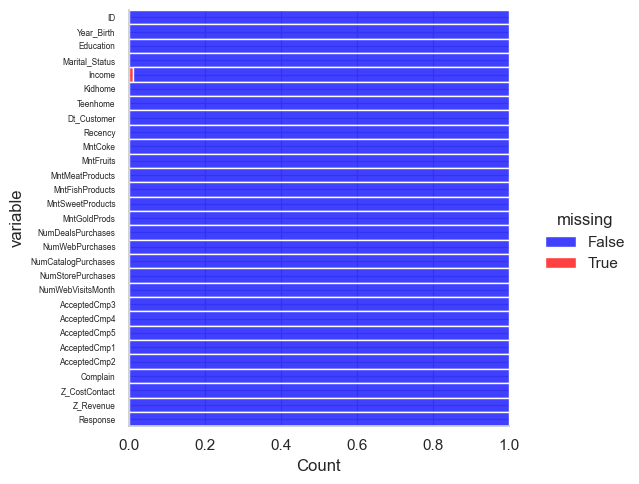

In [8]:
# Visualisasi untuk melihat missing data
plt.figure(figsize=(10,6))

dms = sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25,
    palette = ["blue","red"]
)

dms.set_yticklabels(size = 6)

### Cek Kolom Duplikat

In [9]:
# Jumlah row data yang duplikat
df.duplicated().sum()

0

### Mengelompokkan Tipe Data

In [10]:
categorical = ['ID', 'Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']
            
numerical = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

timestamp = ["Dt_Customer"]

### Mengubah tipe data

In [11]:
#Mengubah tipe data pada kolom "Dt_Csutomer"
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

In [12]:
print('Data type after correction:\n')
df.info()

Data type after correction:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntCoke              2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntS

# Statistical Summary

### Numerical

In [13]:
print('The number of numerical features is {}'.format(len(numerical)))

df[["Year_Birth", "Income", "Kidhome", "Teenhome", "Recency", "MntCoke", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", "Z_CostContact", "Z_Revenue"]].describe().fillna("-").loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],]

The number of numerical features is 18


Year_Birth       Income  Kidhome  Teenhome  Recency    MntCoke  \
count        2240         2216     2240      2240     2240       2240   
mean     1968.806 52247251.354    0.444     0.506   49.109 303935.714   
std        11.984 25173076.661    0.538     0.545   28.962 336597.393   
min          1893      1730000        0         0        0          0   
25%          1959     35303000        0         0       24      23750   
50%          1970     51381500        0         0       49     173500   
75%          1977     68522000        1         1       74     504250   
max          1996    666666000        2         2       99    1493000   

       MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count       2240             2240             2240              2240   
mean   26302.232           166950        37525.446         27062.946   
std    39773.434       225715.373        54628.979         41280.498   
min            0                0                0                 0   
25%         1000            16000             3000              1000   
50%         8000            67000            12000              8000   
75%        33000           232000            50000             33000   
max       199000          1725000           259000            263000   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count          2240               2240             2240                 2240   
mean      44021.875              2.325            4.085                2.662   
std       52167.439              1.932            2.779                2.923   
min               0                  0                0                    0   
25%            9000                  1                2                    0   
50%           24000                  2                4                    2   
75%           56000                  3                6                    4   
max          362000                 15               27                   28   

       NumStorePurchases  NumWebVisitsMonth  Z_CostContact  Z_Revenue  
count               2240               2240           2240       2240  
mean               5.790              5.317              3         11  
std                3.251              2.427              0          0  
min                    0                  0              3         11  
25%                    3                  3              3         11  
50%                    5                  6              3         11  
75%                    8                  7              3         11  
max                   13                 20              3         11

### Categorical

In [14]:
print('The number of categorical features is {}'.format(len(categorical)))

# Membuat copy data
dfc = df.copy()

# Menambahkan observasi "Year Birth"
cat = categorical.copy()
cat.insert(1, "Year_Birth")

# Untuk memudahkan describe, diubah menjadi type category
dfc[cat] = dfc[cat].astype("category")

dfc[cat].describe().transpose()

The number of categorical features is 10


count unique      top  freq
ID              2240   2240        0     1
Year_Birth      2240     59     1976    89
Education       2240      5       S1  1127
Marital_Status  2240      6  Menikah   864
AcceptedCmp1    2240      2        0  2096
AcceptedCmp2    2240      2        0  2210
AcceptedCmp3    2240      2        0  2077
AcceptedCmp4    2240      2        0  2073
AcceptedCmp5    2240      2        0  2077
Complain        2240      2        0  2219
Response        2240      2        0  1906

In [15]:
# Menampilkan jumlah dari setiap category
for i in cat:
    print(i)
    print(dfc[i].value_counts().iloc[:10])
    print()

ID
ID
0       1
7375    1
7348    1
7349    1
7352    1
7366    1
7369    1
7373    1
7378    1
7327    1
Name: count, dtype: int64

Year_Birth
Year_Birth
1976    89
1971    87
1975    83
1972    79
1970    77
1978    77
1973    74
1965    74
1969    71
1974    69
Name: count, dtype: int64

Education
Education
S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: count, dtype: int64

Marital_Status
Marital_Status
Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: count, dtype: int64

AcceptedCmp1
AcceptedCmp1
0    2096
1     144
Name: count, dtype: int64

AcceptedCmp2
AcceptedCmp2
0    2210
1      30
Name: count, dtype: int64

AcceptedCmp3
AcceptedCmp3
0    2077
1     163
Name: count, dtype: int64

AcceptedCmp4
AcceptedCmp4
0    2073
1     167
Name: count, dtype: int64

AcceptedCmp5
AcceptedCmp5
0    2077
1     163
Name: count, dtype: int64

Complain
Complain
0    2219
1      21
Name: count, dtype: int64



# Exploratory Data Analysis (EDA)

## Univariate Analysis

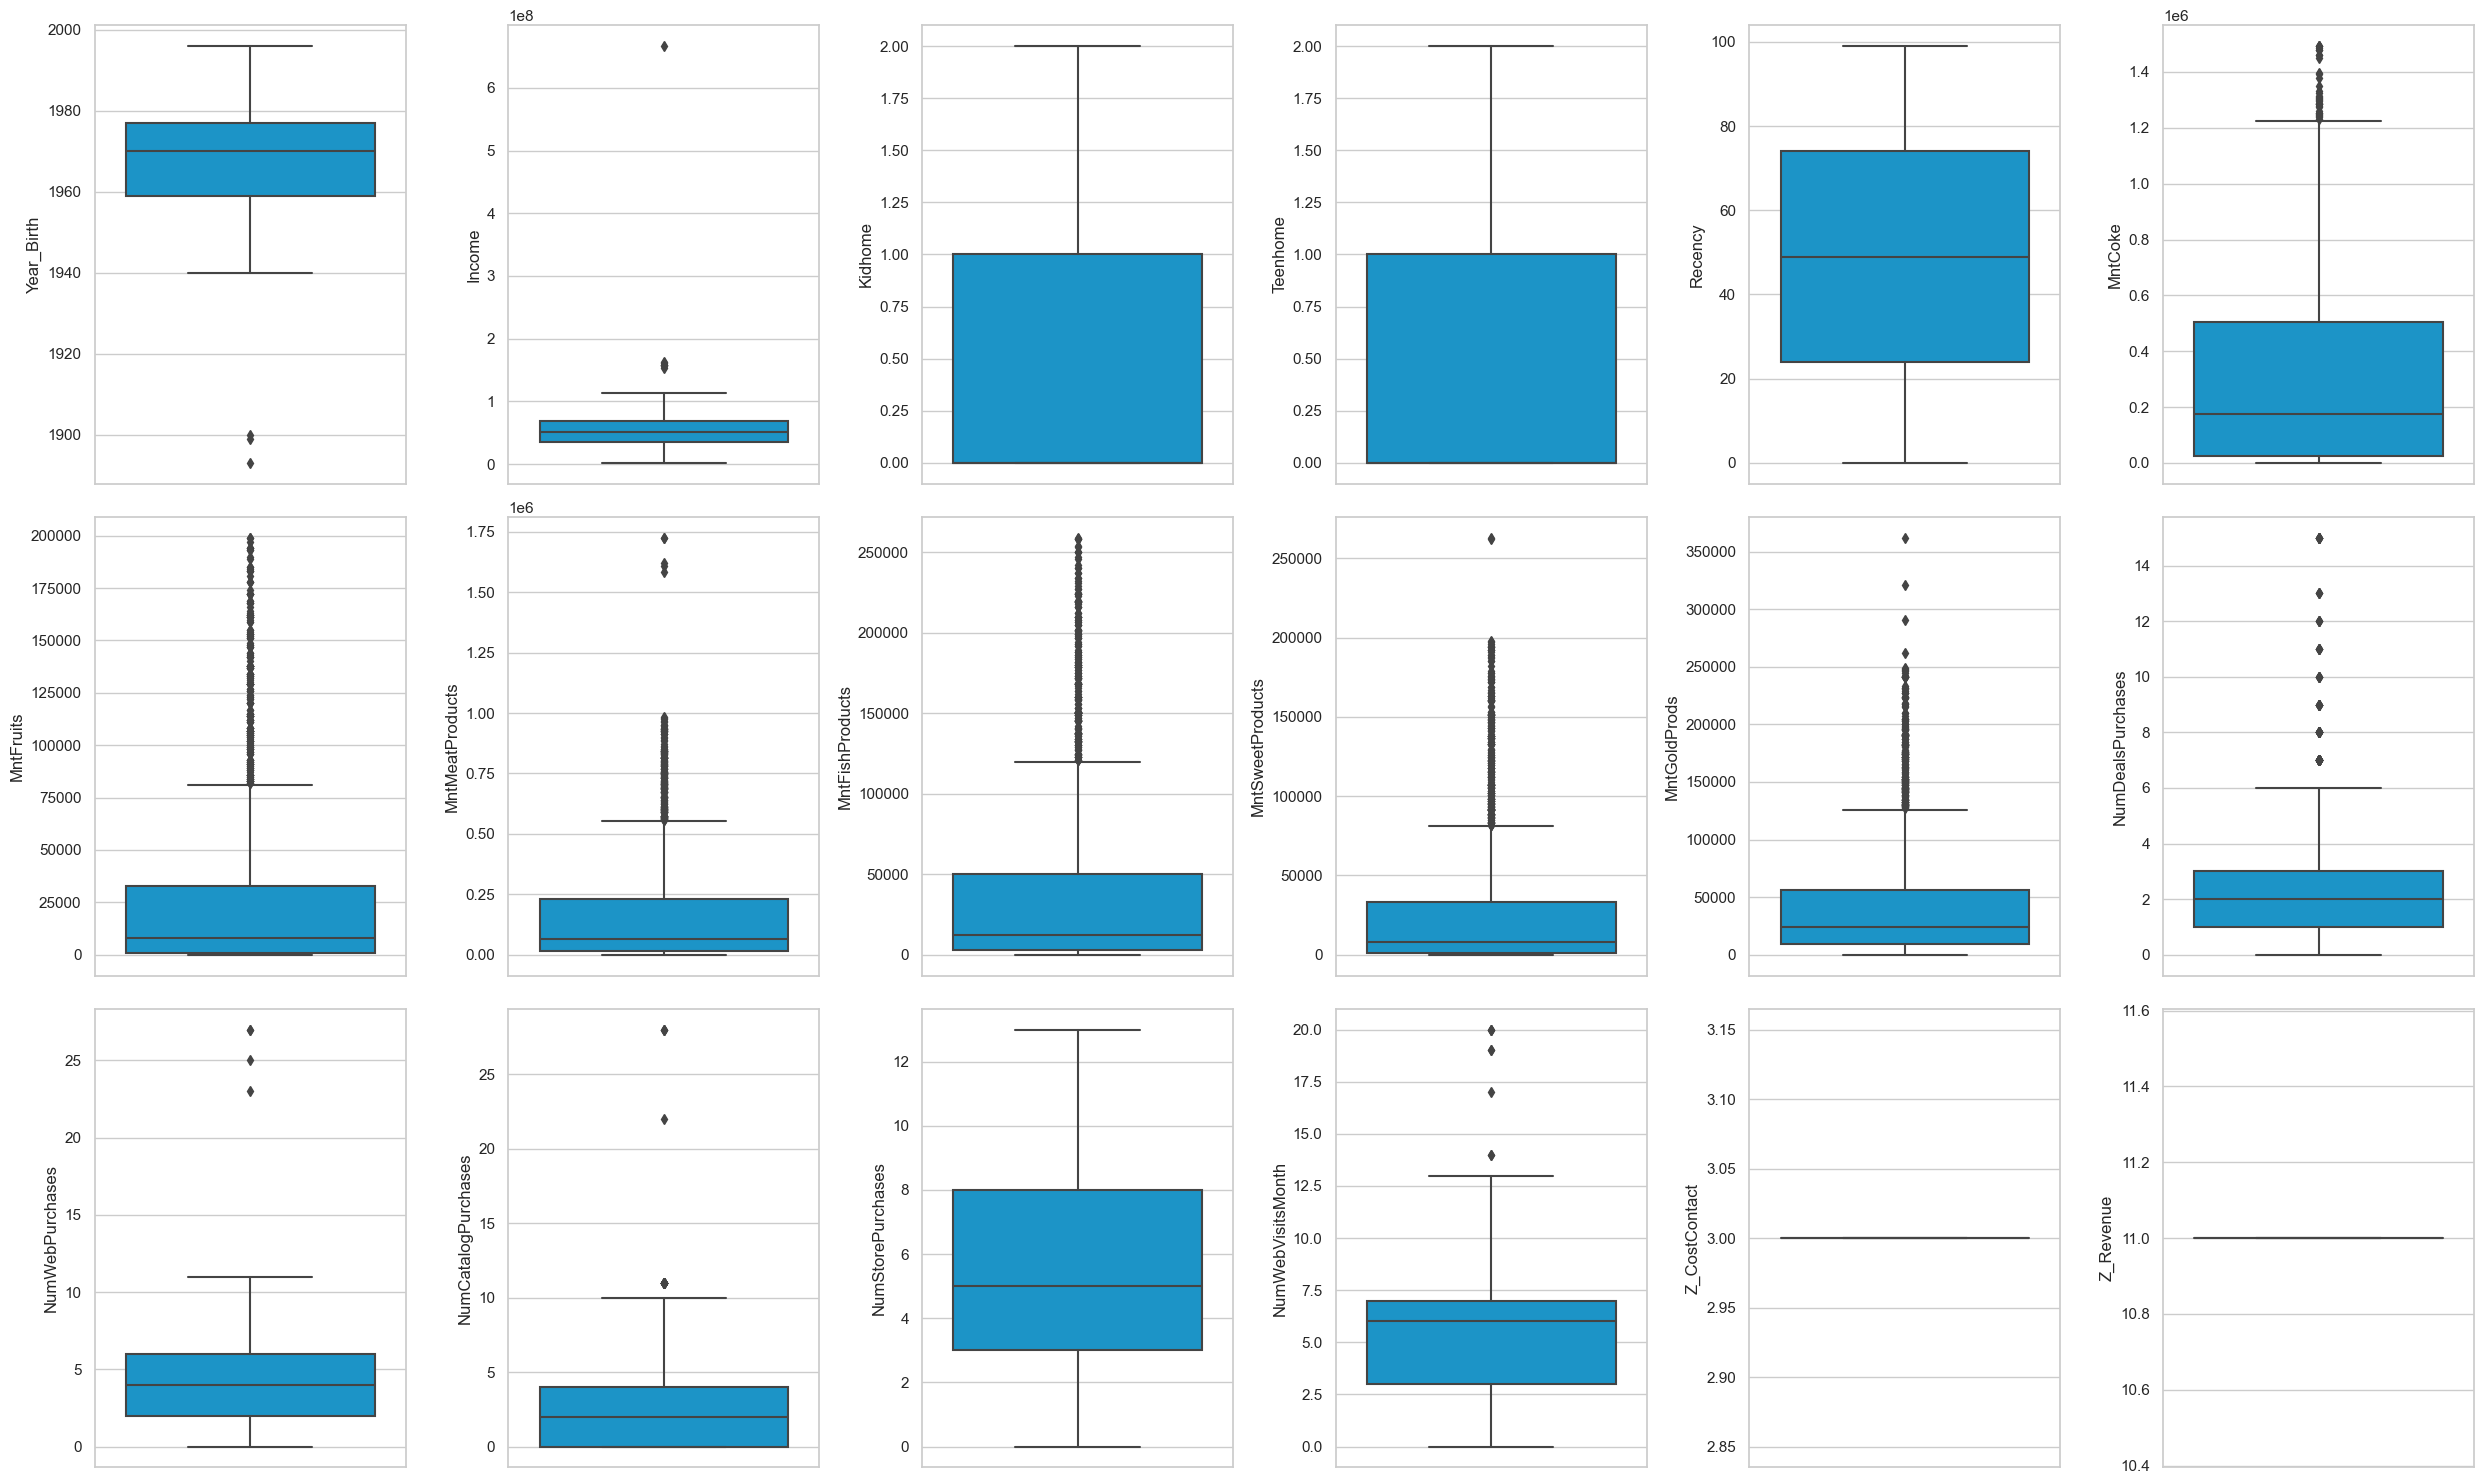

In [16]:
#Visualisasi dengan BoxPlot
plt.figure(figsize=(25, 15))
n = 3
for i in range(0, len(numerical)):
    plt.subplot(n, math.ceil(len(numerical)/n), i+1)
    sns.boxplot(y=df[numerical[i]], color='#009fe3', orient='v')
    plt.tight_layout()

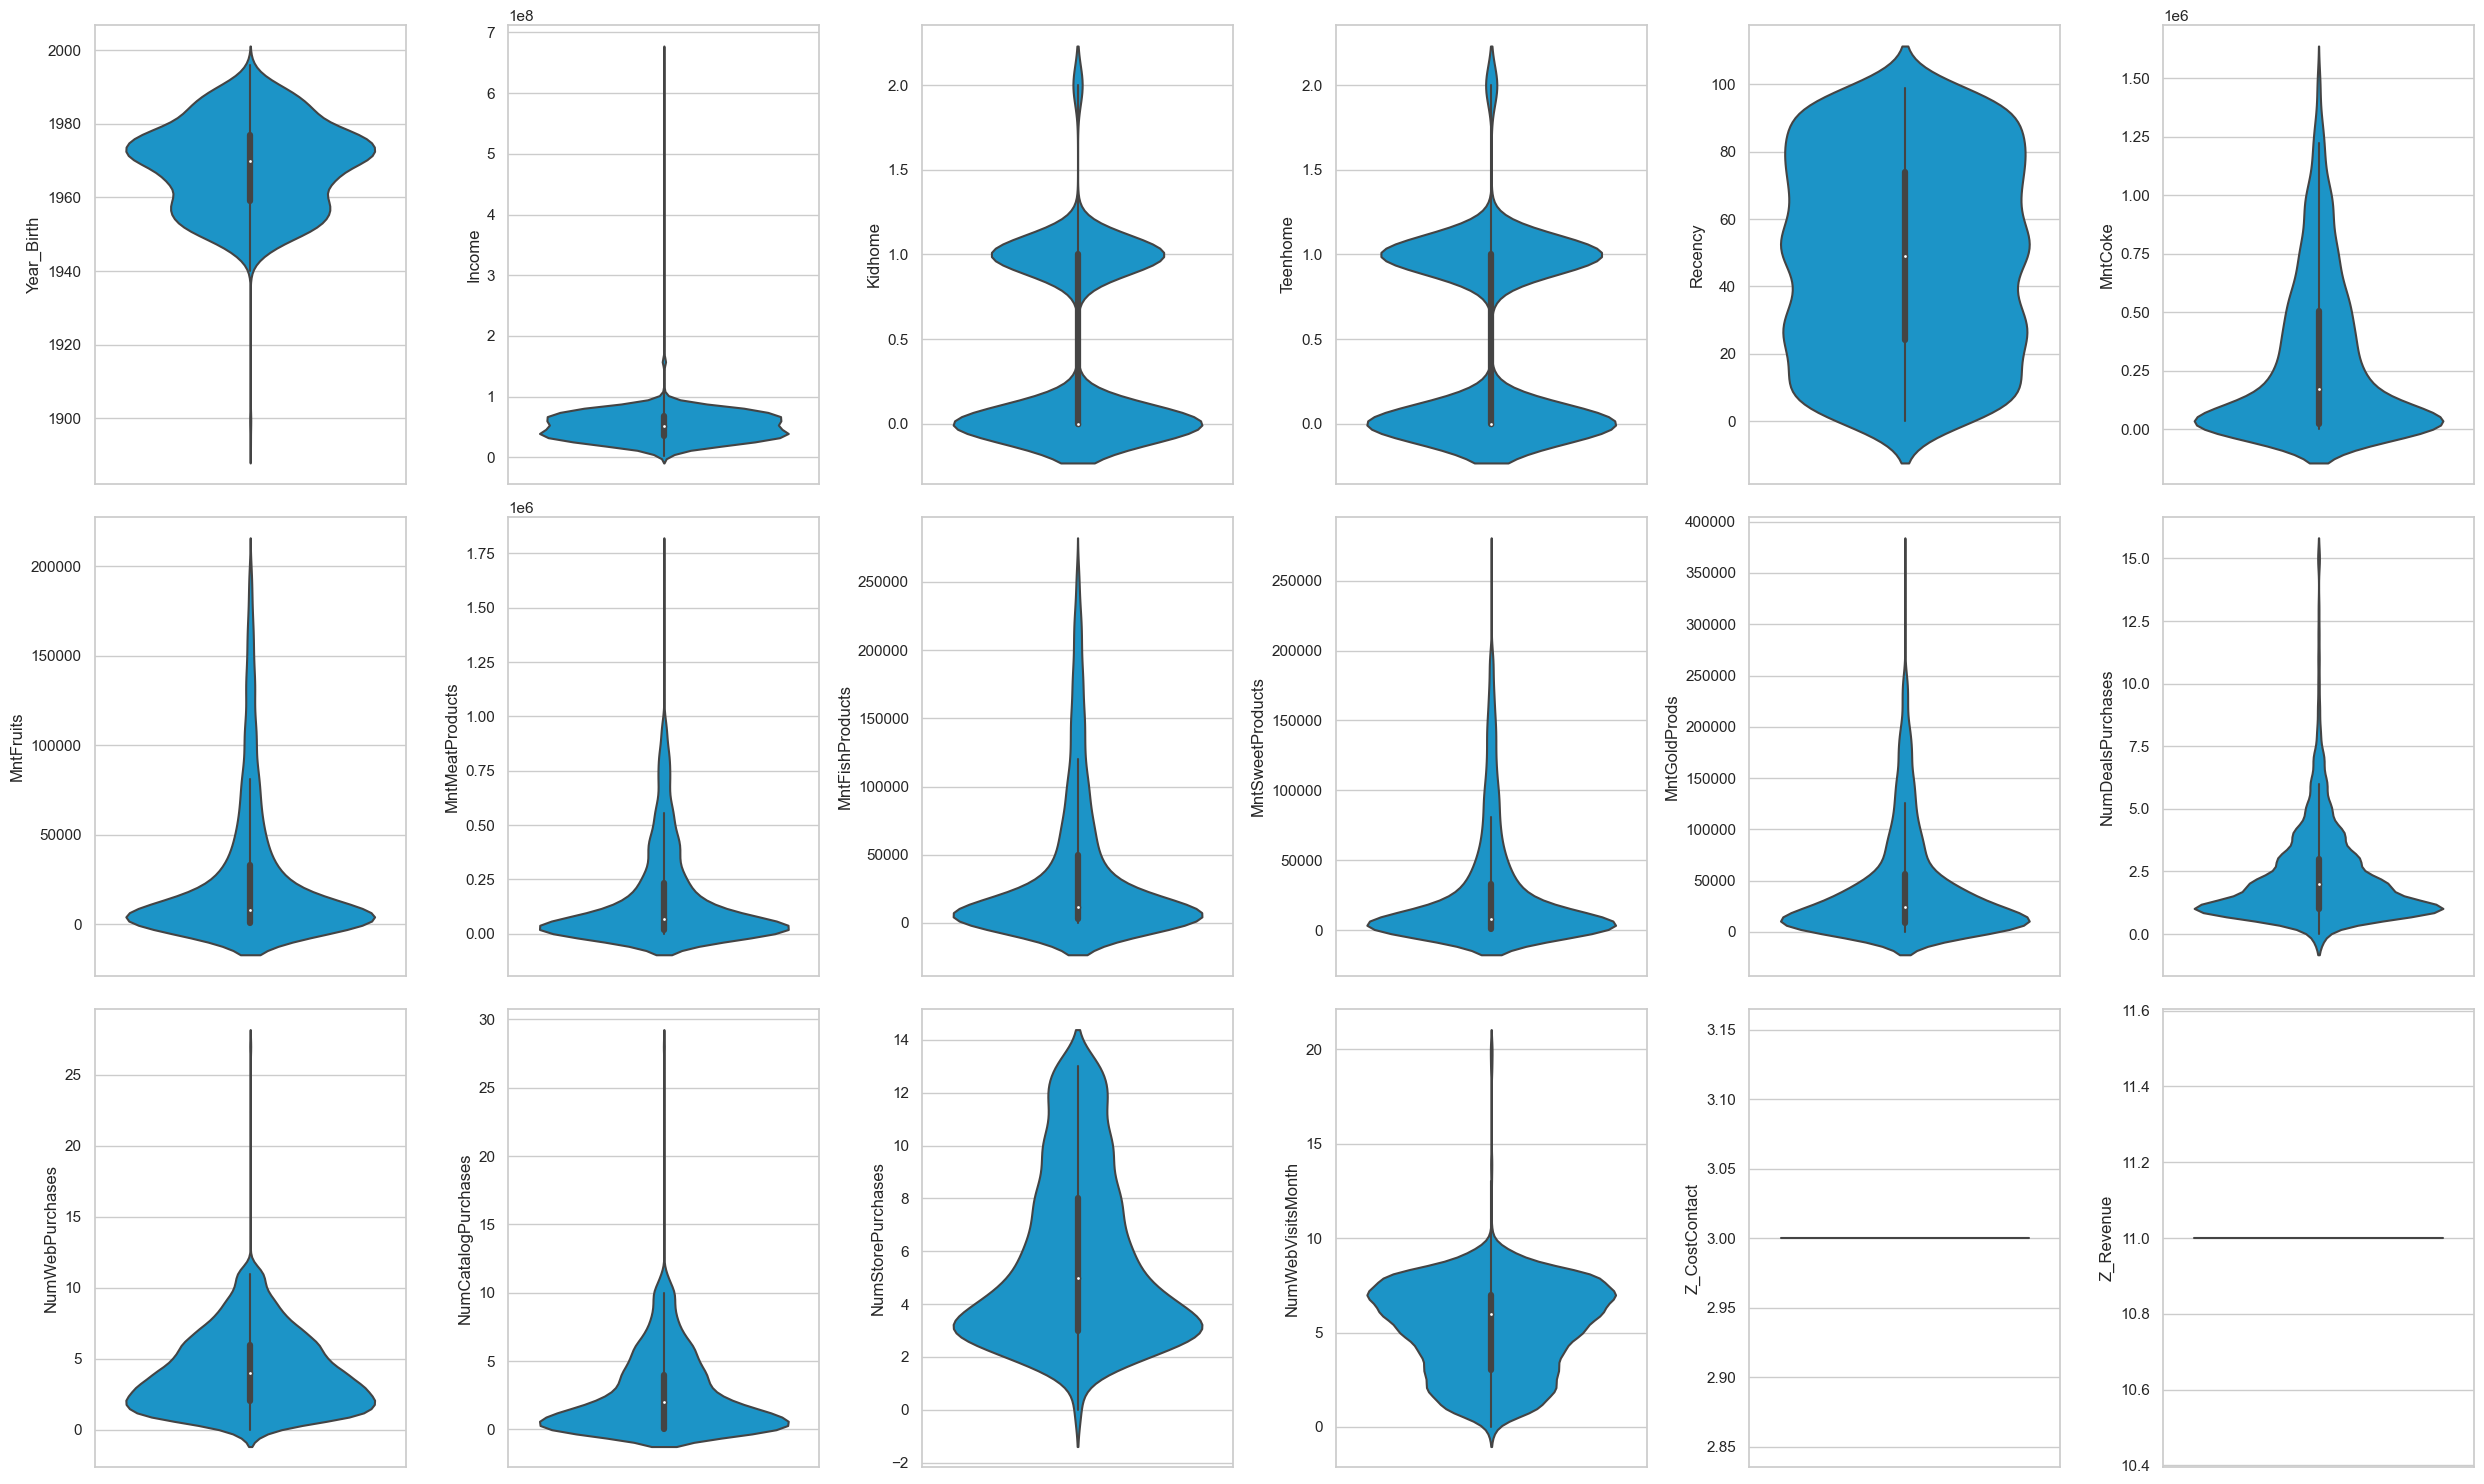

In [17]:
#Visualisasi dengan ViolinPlot
plt.figure(figsize=(25, 15))
n = 3
for i in range(0, len(numerical)):
    plt.subplot(n, math.ceil(len(numerical)/n), i+1)
    sns.violinplot(y=df[numerical[i]], color='#009fe3',orient='v')
    plt.tight_layout()

In [18]:
#Cek Outliers
print(f'Jumlah baris: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []

filtered_entries = np.array([True] * len(df))
for col in numerical:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= low_limit) & (df[col] <= high_limit))
    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_lim.append(low_limit)
    high_lim.append(high_limit)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

print("Outlier All Data :", len(df[~filtered_entries]))
print("Not Outlier All Data :", len(df[filtered_entries]))
print()

pd.DataFrame({
    "Column Name":numerical,
    "is Outlier": is_outlier,
    "Lower Limit": low_lim,
    "Upper Limit": high_lim,
    "Outlier":outlier,
    "No Outlier":no_outlier
})

Jumlah baris: 2240
Outlier All Data : 723
Not Outlier All Data : 1517



Column Name  is Outlier  Lower Limit  Upper Limit  Outlier  \
0            Year_Birth        True         1932         2004        3   
1                Income        True    -14525500    118350500       32   
2               Kidhome       False       -1.500        2.500        0   
3              Teenhome       False       -1.500        2.500        0   
4               Recency       False          -51          149        0   
5               MntCoke        True      -697000      1225000       35   
6             MntFruits        True       -47000        81000      227   
7       MntMeatProducts        True      -308000       556000      175   
8       MntFishProducts        True       -67500       120500      223   
9      MntSweetProducts        True       -47000        81000      248   
10         MntGoldProds        True       -61500       126500      207   
11    NumDealsPurchases        True           -2            6       86   
12      NumWebPurchases        True           -4           12        4   
13  NumCatalogPurchases        True           -6           10       23   
14    NumStorePurchases       False       -4.500       15.500        0   
15    NumWebVisitsMonth        True           -3           13        8   
16        Z_CostContact       False            3            3        0   
17            Z_Revenue       False           11           11        0   

    No Outlier  
0         2237  
1         2208  
2         2240  
3         2240  
4         2240  
5         2205  
6         2013  
7         2065  
8         2017  
9         1992  
10        2033  
11        2154  
12        2236  
13        2217  
14        2240  
15        2232  
16        2240  
17        2240

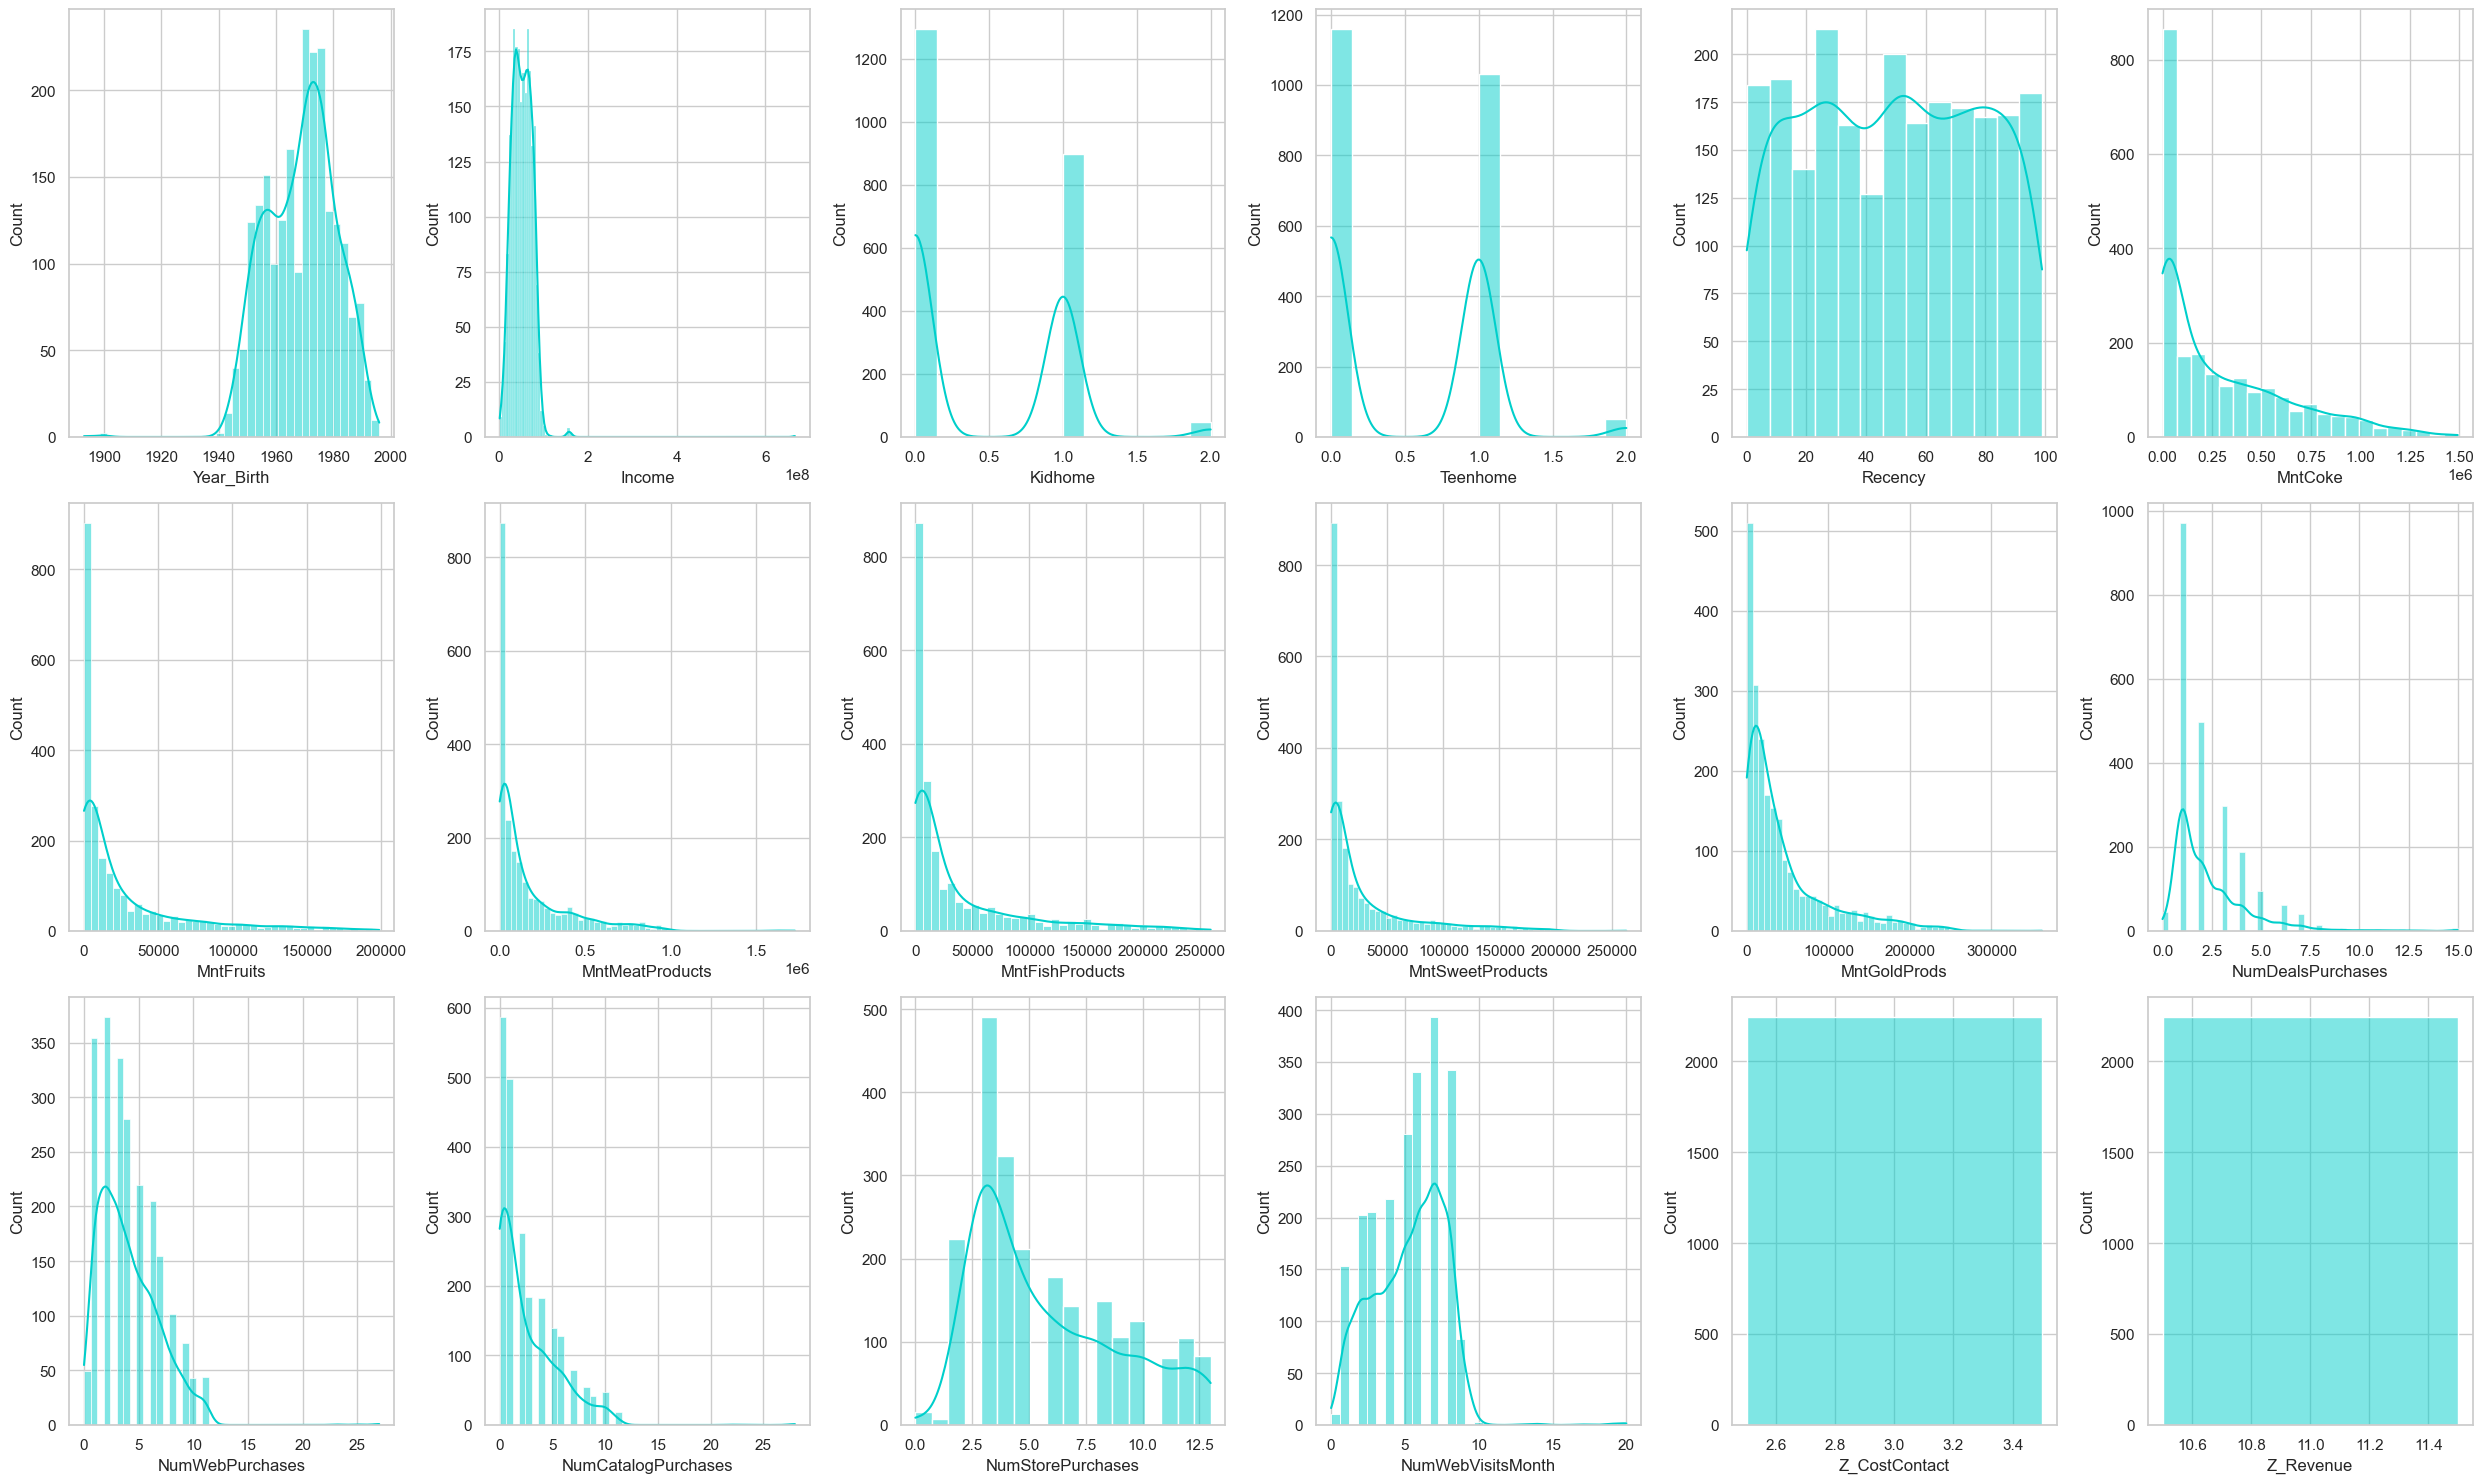

In [19]:
#Visualisasi dengan Distplot
plt.figure(figsize=(25, 15))
n = 3
for i in range(0, len(numerical)):
    plt.subplot(n, math.ceil(len(numerical)/n), i+1) 
    sns.histplot(df[numerical[i]], color='#00cfcb', kde=True)
    plt.tight_layout()

In [20]:
#Cek Distribusi Data
skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in numerical:
    data = df[column].dropna(axis=0) 
    q1 = data.quantile(q=0.25)
    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]
    q3 = data.quantile(q=0.75)
    # skew_val = round(data.skew(),3)
    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)
            
dist = pd.DataFrame({
    "Column Name":numerical,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# for bimodial and Uniform

dist.loc[dist["Column Name"].isin(["Z_CostContact", "Z_Revenue"]), "Type of Distribution"] = "Uniform Distribution"
dist.loc[dist["Column Name"].isin(["Kidhome", "Teenhome"]), "Type of Distribution"] = "Bimodal Distribution"
dist

Column Name  Skewness  Kurtosis  \
0            Year_Birth    -0.350     0.713   
1                Income     6.759   159.274   
2               Kidhome     0.635    -0.781   
3              Teenhome     0.407    -0.987   
4               Recency    -0.002    -1.202   
5               MntCoke     1.175     0.595   
6             MntFruits     2.101     4.039   
7       MntMeatProducts     2.082     5.502   
8       MntFishProducts     1.918     3.087   
9      MntSweetProducts     2.135     4.364   
10         MntGoldProds     1.885     3.541   
11    NumDealsPurchases     2.417     8.914   
12      NumWebPurchases     1.382     5.688   
13  NumCatalogPurchases     1.880     8.027   
14    NumStorePurchases     0.702    -0.623   
15    NumWebVisitsMonth     0.208     1.815   
16        Z_CostContact       NaN       NaN   
17            Z_Revenue       NaN       NaN   

                          Type of Distribution  
0   Moderately Normal Distribution (Symmetric)  
1                     Highly Positively Skewed  
2                         Bimodal Distribution  
3                         Bimodal Distribution  
4              Normal Distribution (Symmetric)  
5                     Highly Positively Skewed  
6                     Highly Positively Skewed  
7                     Highly Positively Skewed  
8                     Highly Positively Skewed  
9                     Highly Positively Skewed  
10                    Highly Positively Skewed  
11                    Highly Positively Skewed  
12                    Highly Positively Skewed  
13                    Highly Positively Skewed  
14                Moderately Positively Skewed  
15  Moderately Normal Distribution (Symmetric)  
16                        Uniform Distribution  
17                        Uniform Distribution

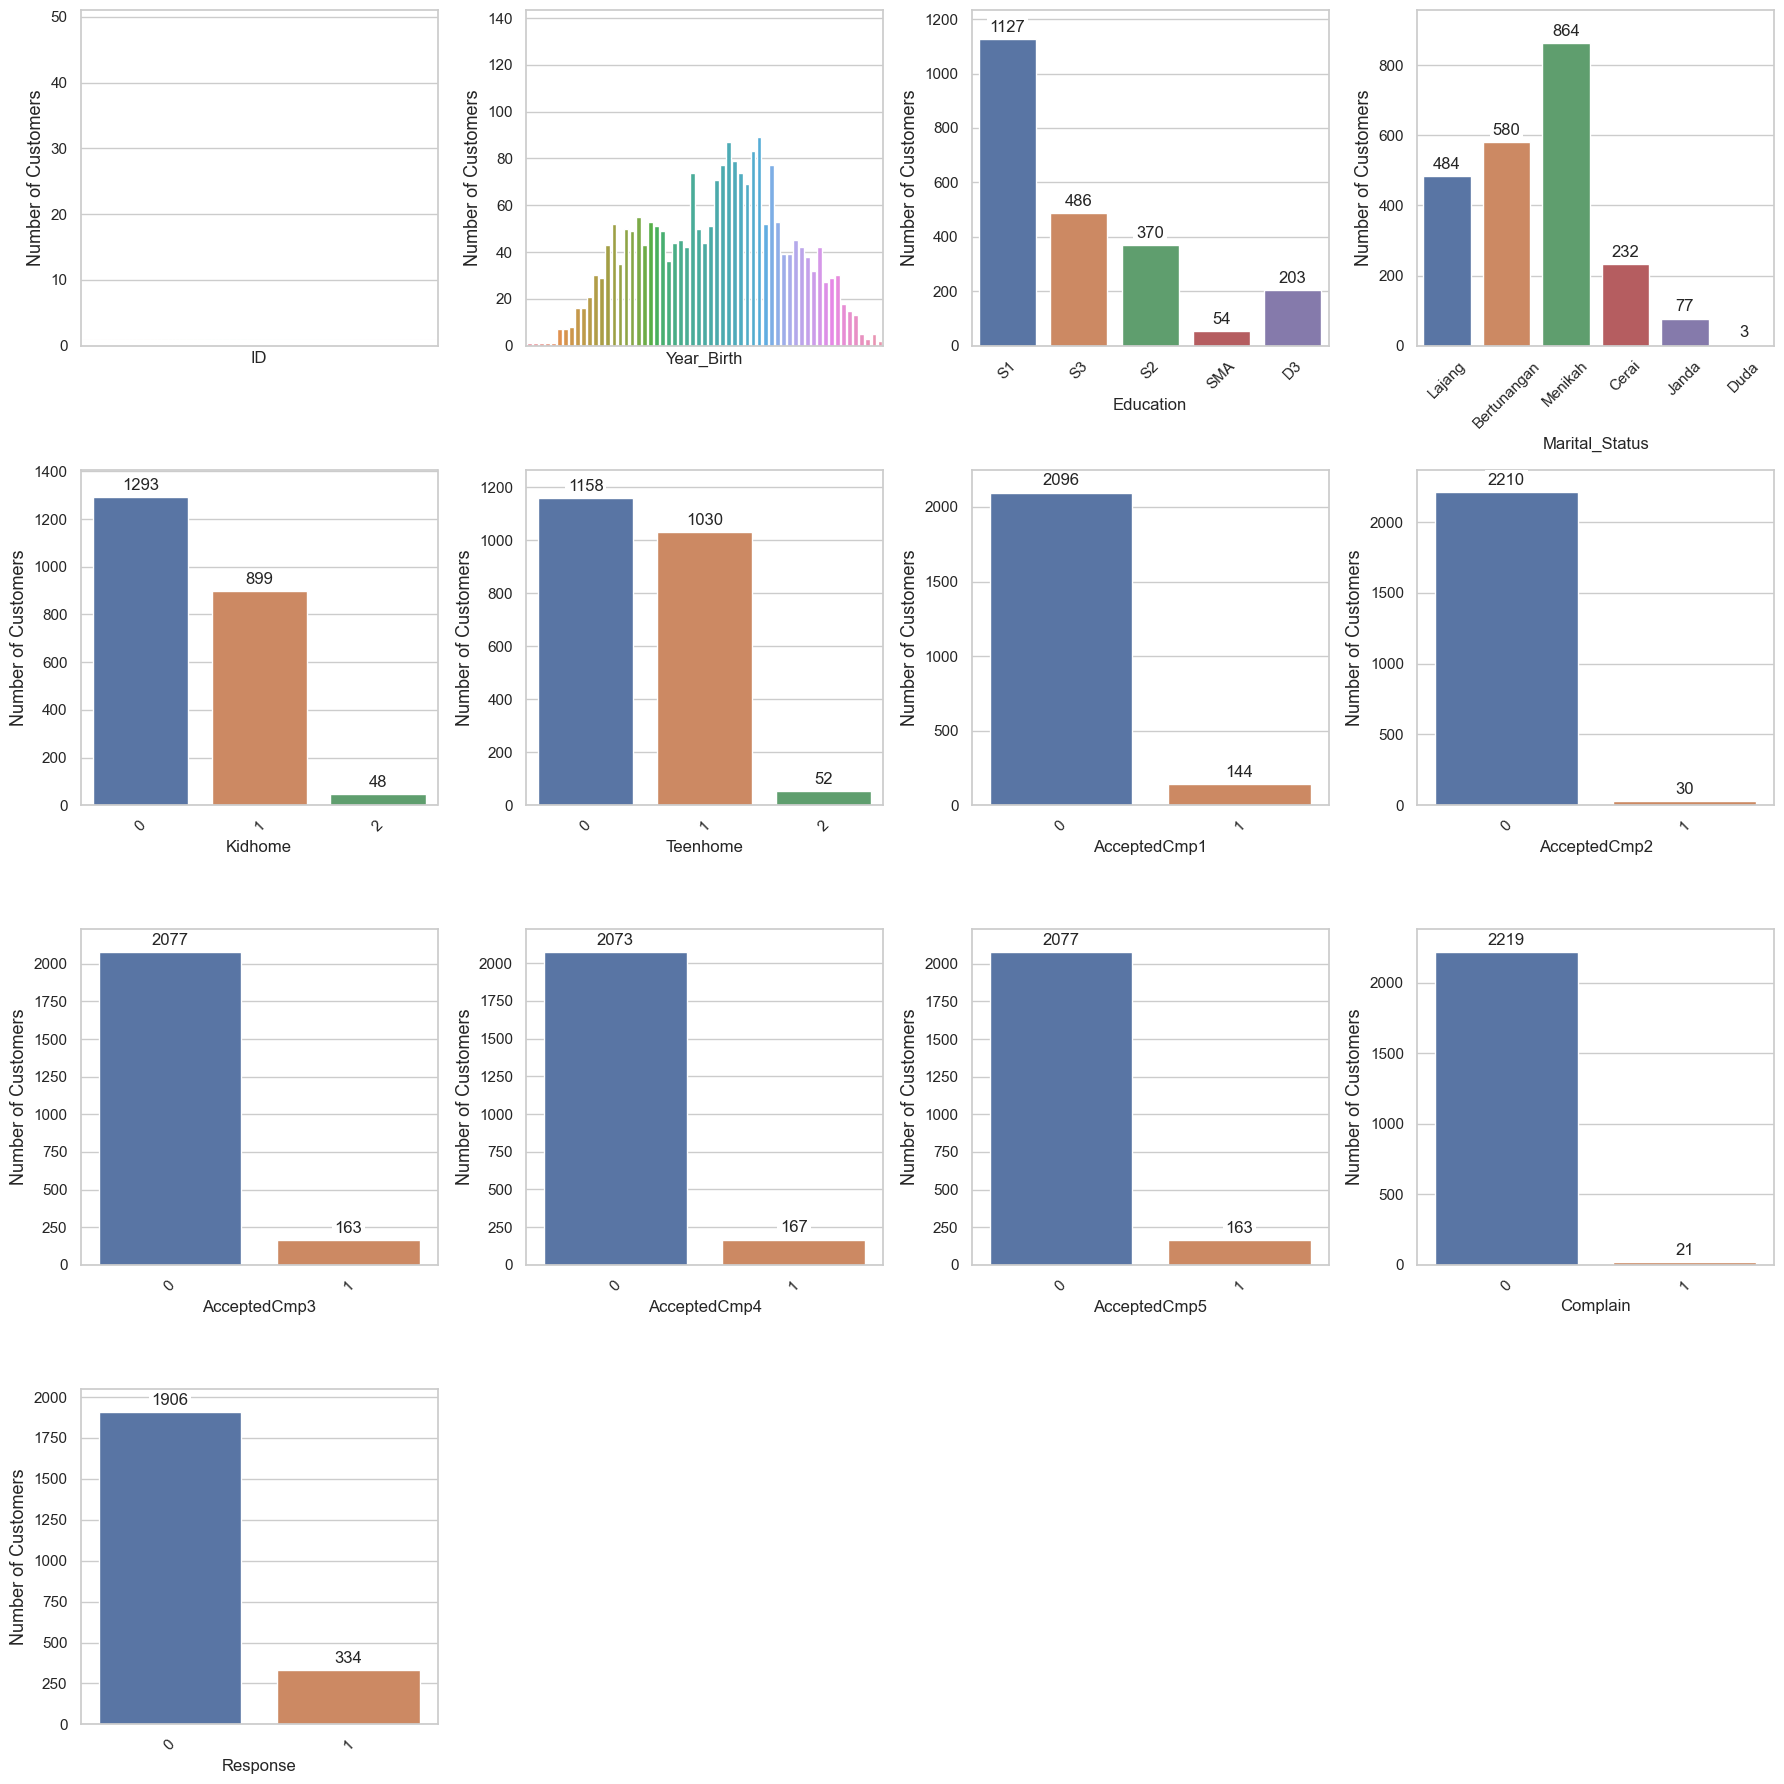

In [21]:
#Visualisasi dengan CountPlot
cat = categorical.copy()
cat.insert(1, "Year_Birth")
cat.insert(4, "Kidhome")
cat.insert(5, "Teenhome")

n=4
fig = plt.figure(figsize=(18, 18))
for i in range(0, len(cat)):
    fig.add_subplot(n, math.ceil(len(cat)/n), i+1)
    bar = sns.countplot(x=df[cat[i]], orient='h')
    if cat[i] not in ["ID", "Year_Birth"]:
        for i in bar.patches:
            bar.annotate(int(i.get_height()),
                    xy=(i.get_x() + i.get_width() / 2, i.get_height()),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom',
                    bbox=dict(facecolor='white', edgecolor="None", pad=2))
    else :
        plt.xticks([])
    sns.color_palette("BuGn")
    plt.xticks(rotation=45)
    y_start, y_end = plt.ylim()
    plt.ylim(0, y_end+50)
    plt.ylabel('Number of Customers',fontsize=13)
    plt.tight_layout()

## Multivariate Analysis

<Axes: >

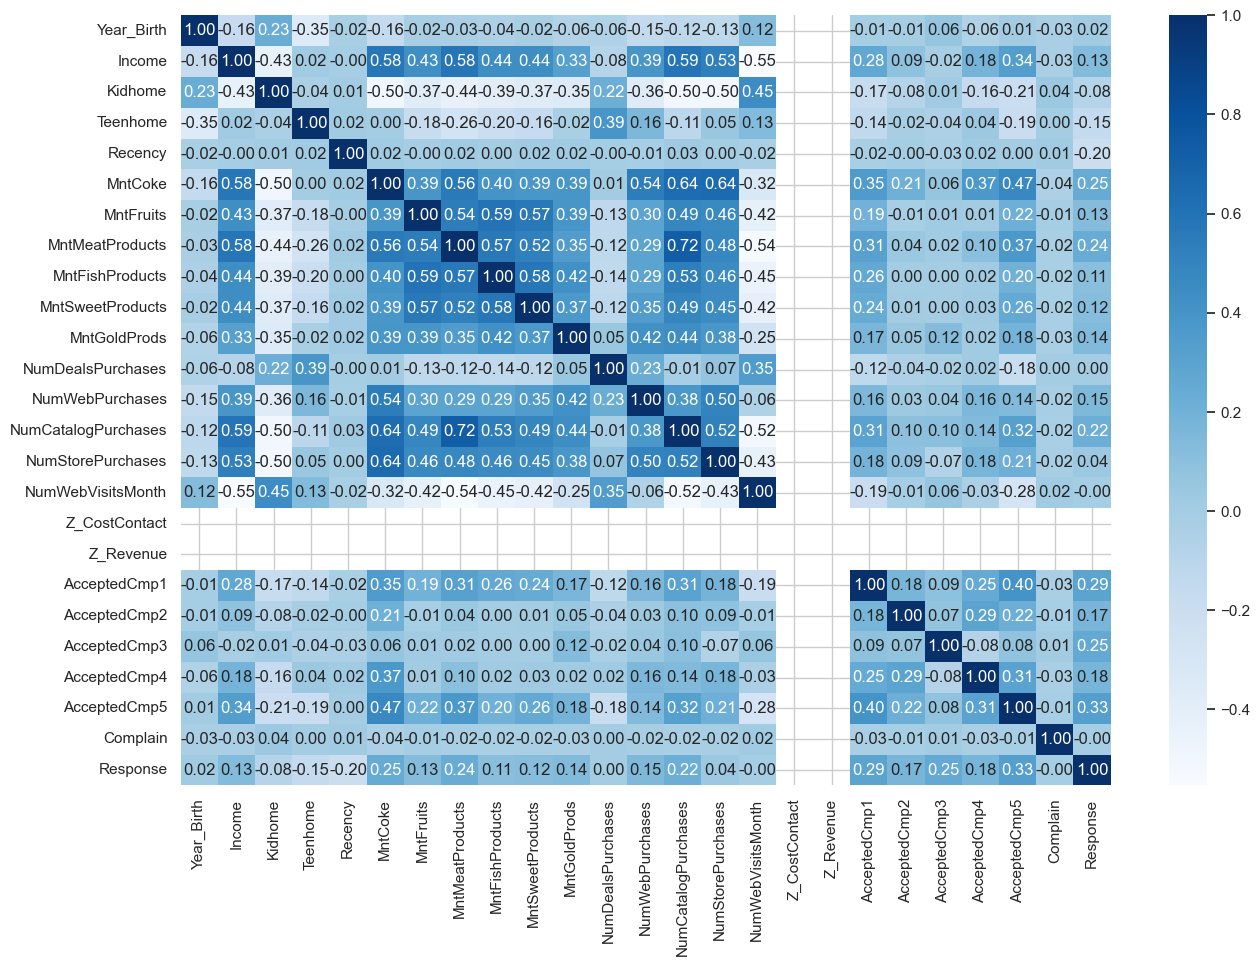

In [22]:
#Visualisasi dengan HeatMap untuk melihat korelasi
cat = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']].astype("int64")
dfhmap = pd.concat([df[numerical], cat], axis=1)

plt.figure(figsize=(15,10))
sns.heatmap(dfhmap.corr(), cmap='Blues', annot=True, fmt='.2f')

In [23]:
#Cek korelasi dari setiap variabel
corr_matrix = dfhmap.corr()

# Flatten correlation matrix.
flat_cm = corr_matrix.stack().reset_index()
flat_cm.columns = ["Variable 1", "Variable 2", "Corr Value"]    
flat_cm = flat_cm.loc[flat_cm["Corr Value"] < 1, :]
flat_cm = flat_cm.sort_values("Corr Value", ascending=False)
flat_cm["Corr Type"] = flat_cm["Corr Value"].apply(lambda x : "Positif" if x >= 0 else "Negatif")
flat_cm["Corr Value"] = flat_cm["Corr Value"].apply(lambda x : abs(x))
flat_cm.sort_values("Corr Value", ascending=False, ignore_index=True, inplace=True)

redundan = flat_cm[flat_cm["Corr Value"] >= 0.5]
redundan = redundan.drop_duplicates(subset=["Corr Value", "Corr Type"]).reset_index(drop=True)
redundan

Variable 1           Variable 2  Corr Value Corr Type
0   NumCatalogPurchases      MntMeatProducts       0.724   Positif
1               MntCoke    NumStorePurchases       0.642   Positif
2               MntCoke  NumCatalogPurchases       0.635   Positif
3       MntFishProducts            MntFruits       0.595   Positif
4   NumCatalogPurchases               Income       0.589   Positif
5                Income      MntMeatProducts       0.585   Positif
6       MntFishProducts     MntSweetProducts       0.580   Positif
7               MntCoke               Income       0.579   Positif
8       MntFishProducts      MntMeatProducts       0.568   Positif
9      MntSweetProducts            MntFruits       0.567   Positif
10      MntMeatProducts              MntCoke       0.563   Positif
11    NumWebVisitsMonth               Income       0.553   Negatif
12      MntMeatProducts            MntFruits       0.543   Positif
13              MntCoke      NumWebPurchases       0.542   Positif
14    NumWebVisitsMonth      MntMeatProducts       0.539   Negatif
15      MntFishProducts  NumCatalogPurchases       0.534   Positif
16               Income    NumStorePurchases       0.529   Positif
17     MntSweetProducts      MntMeatProducts       0.524   Positif
18    NumWebVisitsMonth  NumCatalogPurchases       0.520   Negatif
19    NumStorePurchases  NumCatalogPurchases       0.519   Positif
20    NumStorePurchases      NumWebPurchases       0.503   Positif
21  NumCatalogPurchases              Kidhome       0.502   Negatif

## Korelasi antar variabel terhadap variabel response

In [24]:
#Cek koreasi terhadap variabel response

corr = dfhmap.corrwith(dfhmap["Response"])
corr = corr.reset_index(name='corr value')
corr = corr[corr["index"] != "Response"]
corr["Corr Type"] = corr["corr value"].apply(lambda x : "Positif" if x >= 0 else "Negatif")
corr["corr value"] = corr["corr value"].apply(lambda x : abs(x))
corr.sort_values('corr value', ascending=False, ignore_index=True)

index  corr value Corr Type
0          AcceptedCmp5       0.327   Positif
1          AcceptedCmp1       0.294   Positif
2          AcceptedCmp3       0.254   Positif
3               MntCoke       0.247   Positif
4       MntMeatProducts       0.236   Positif
5   NumCatalogPurchases       0.221   Positif
6               Recency       0.198   Negatif
7          AcceptedCmp4       0.177   Positif
8          AcceptedCmp2       0.169   Positif
9              Teenhome       0.154   Negatif
10      NumWebPurchases       0.149   Positif
11         MntGoldProds       0.140   Positif
12               Income       0.133   Positif
13            MntFruits       0.125   Positif
14     MntSweetProducts       0.117   Positif
15      MntFishProducts       0.111   Positif
16              Kidhome       0.080   Negatif
17    NumStorePurchases       0.039   Positif
18           Year_Birth       0.021   Positif
19    NumWebVisitsMonth       0.004   Negatif
20    NumDealsPurchases       0.002   Positif
21             Complain       0.002   Negatif
22        Z_CostContact         NaN   Negatif
23            Z_Revenue         NaN   Negatif

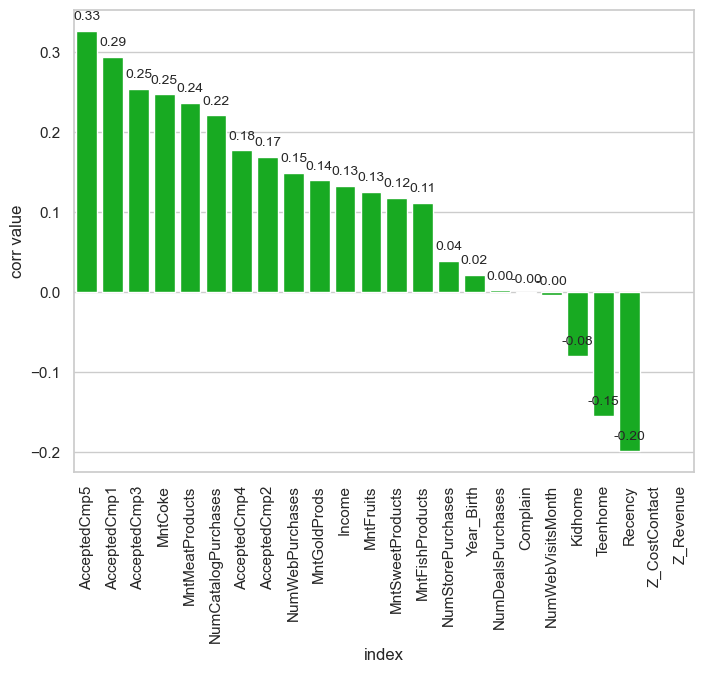

In [25]:
#Visualisasikan hasil korelasinya dengan BarPlot
corr = dfhmap.corrwith(dfhmap["Response"])
corr = corr.reset_index(name='corr value')
corr = corr.sort_values('corr value', ascending=False)[1:]

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='index', y="corr value", data=corr, order=corr["index"], color='#00c20d')
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():0.2f}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', 
        va = 'center', 
        xytext = (0, 10), 
        fontsize=10,
        textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()

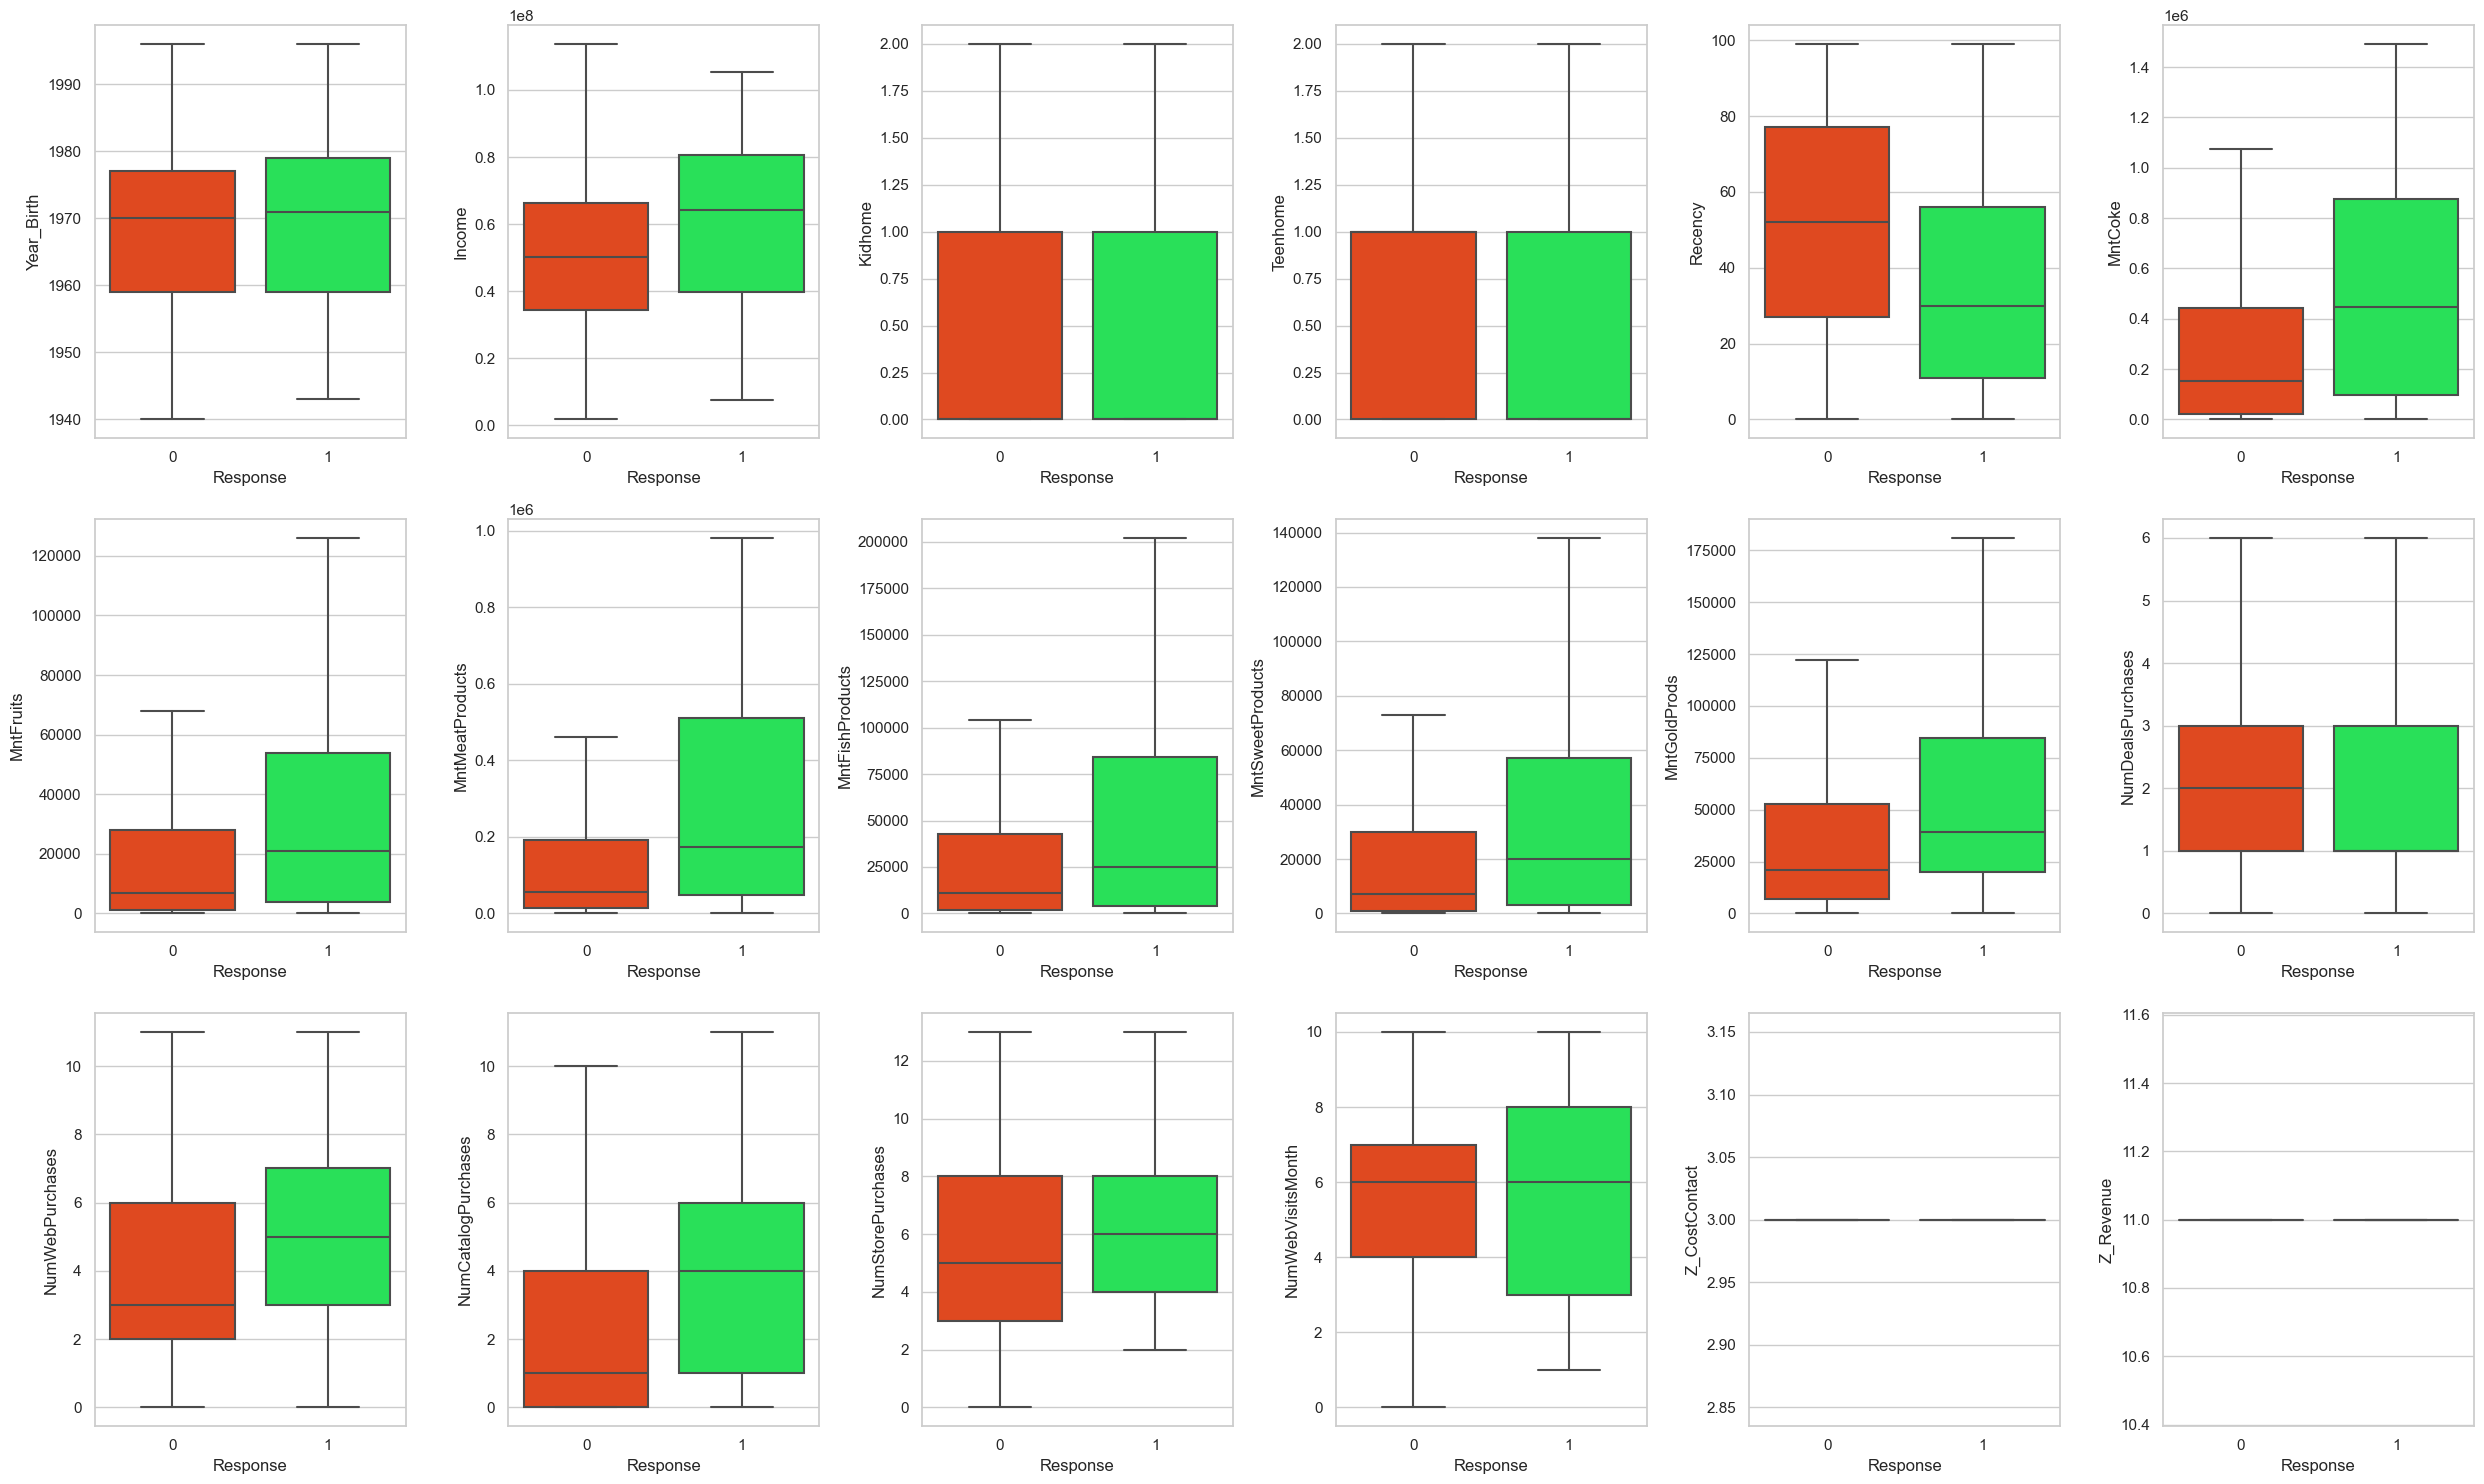

In [26]:
#Visualisasi kolom numerikal berdasarkan respon dengan BoxPlot
plt.figure(figsize=(25, 15))
colors=["#ff3700", "#0aff4b"]
n = 3
for i in range(0, len(numerical)):
    plt.subplot(n, math.ceil(len(numerical)/n), i+1)
    sns.boxplot(x=df["Response"], y=df[numerical[i]], orient='v', palette=colors, showfliers=False)
    # sns.boxplot(x=df["Response"], y=df[num_cols[i]], orient='v', palette=colors)
    plt.tight_layout()

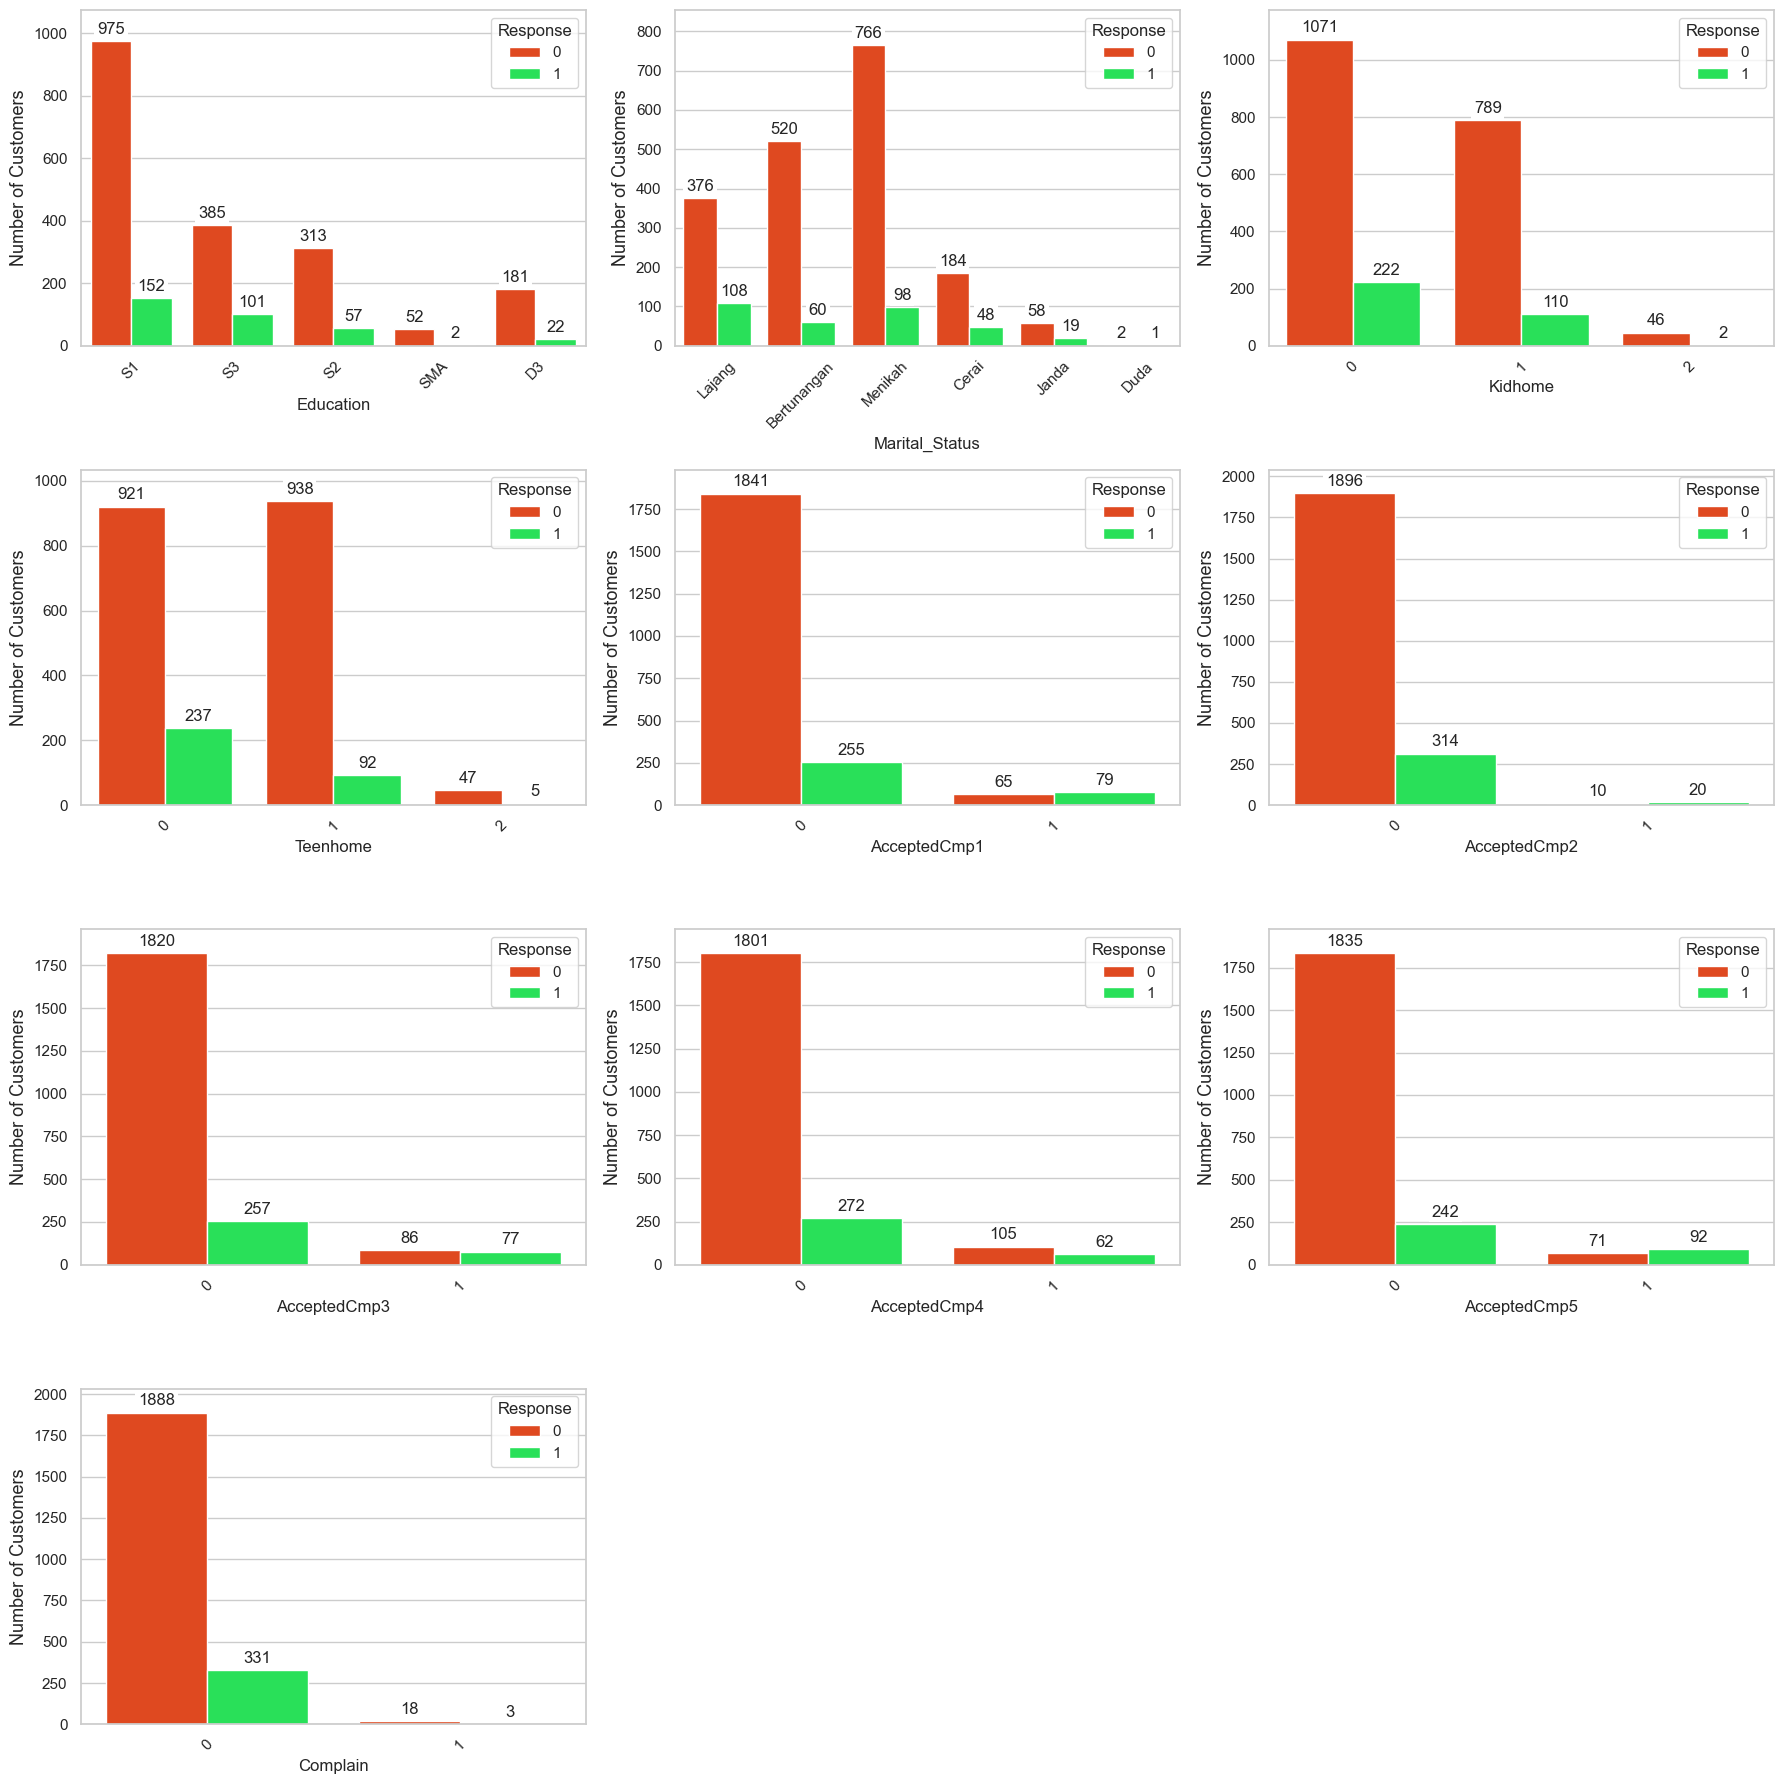

In [27]:
#Visualisasi kolom kategorikal berdasarkan respon dengan CountPlot
cat = categorical.copy()
cat.insert(3, "Kidhome")
cat.insert(4, "Teenhome")
cat.remove("ID")
cat.remove("Response")

colors=["#ff3700", "#0aff4b"]

n=4
fig = plt.figure(figsize=(18, 18))
for i in range(0, len(cat)):
    fig.add_subplot(n, math.ceil(len(cat)/n), i+1)
    bar = sns.countplot(x=df[cat[i]], hue=df["Response"], palette=colors, orient='h')
    for i in bar.patches:
        bar.annotate(int(i.get_height()),
                xy=(i.get_x() + i.get_width() / 2, i.get_height()),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom',
                bbox=dict(facecolor='white', edgecolor="None", pad=2))
    sns.color_palette("YlOrBr")
    plt.xticks(rotation=45)
    y_start, y_end = plt.ylim()
    plt.ylim(0, y_end+50)
    plt.ylabel('Number of Customers',fontsize=13)
    plt.tight_layout()

In [28]:
cat = ['Education', 'Marital_Status','Kidhome','Teenhome']

dfg_all = pd.DataFrame()

for i in cat:
    category = i

    # group data by Education & Response
    dfg1 = df.groupby([category, "Response"]).agg({"ID":"nunique"}).reset_index()
    dfg1.rename(columns={"ID":"nCustomer"}, inplace=True)

    # group data by Education
    dfg2 = df.groupby([category]).agg({"ID":"nunique"}).reset_index()
    dfg2.rename(columns={"ID":"nAllCustomer"}, inplace=True)

    # merge data
    dfg = dfg1.merge(dfg2, on=category)

    # calculate ratio
    dfg["ratio"] = (dfg["nCustomer"]/dfg["nAllCustomer"])*100

    # change 1 0 category to Yes No
    dfg["Response"] = dfg["Response"].apply(lambda x: "Yes" if x == 1 else "No")
    dfg["Category"] = category
    dfg.rename(columns={category: "Type"}, inplace=True)
    
    dfg = dfg[dfg["Response"] == "Yes"].copy()
    dfg.sort_values(by=['ratio'], ascending=False, inplace=True)
    dfg_all = pd.concat([dfg_all, dfg], axis=0)

dfg_all.set_index(['Category', 'Type', 'Response'])

nCustomer  nAllCustomer  ratio
Category       Type        Response                                
Education      S3          Yes             101           486 20.782
               S2          Yes              57           370 15.405
               S1          Yes             152          1127 13.487
               D3          Yes              22           203 10.837
               SMA         Yes               2            54  3.704
Marital_Status Duda        Yes               1             3 33.333
               Janda       Yes              19            77 24.675
               Lajang      Yes             108           484 22.314
               Cerai       Yes              48           232 20.690
               Menikah     Yes              98           864 11.343
               Bertunangan Yes              60           580 10.345
Kidhome        0           Yes             222          1293 17.169
               1           Yes             110           899 12.236
               2           Yes               2            48  4.167
Teenhome       0           Yes             237          1158 20.466
               2           Yes               5            52  9.615
               1           Yes              92          1030  8.932

In [29]:
cat = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Complain']

dfg_all = pd.DataFrame()

for i in cat:
    category = i

    # group data by Education & Response
    dfg1 = df.groupby([category, "Response"]).agg({"ID":"nunique"}).reset_index()
    dfg1.rename(columns={"ID":"nCustomer"}, inplace=True)

    # group data by Education
    dfg2 = df.groupby([category]).agg({"ID":"nunique"}).reset_index()
    dfg2.rename(columns={"ID":"nAllCustomer"}, inplace=True)

    # merge data
    dfg = dfg1.merge(dfg2, on=category)

    # calculate ratio
    dfg["ratio"] = (dfg["nCustomer"]/dfg["nAllCustomer"])*100

    # change 1 0 category to Yes No
    dfg["Response"] = dfg["Response"].apply(lambda x: "Yes" if x == 1 else "No")
    dfg["Category"] = category
    dfg.rename(columns={category: "Type"}, inplace=True)
    
    dfg = dfg[dfg["Response"] == "Yes"].copy()
    dfg.sort_values(by=['ratio'], ascending=False, inplace=True)
    dfg_all = pd.concat([dfg_all, dfg], axis=0)

dfg_all.set_index(['Category', 'Type', 'Response'])

nCustomer  nAllCustomer  ratio
Category     Type Response                                
AcceptedCmp1 1    Yes              79           144 54.861
             0    Yes             255          2096 12.166
AcceptedCmp2 1    Yes              20            30 66.667
             0    Yes             314          2210 14.208
AcceptedCmp3 1    Yes              77           163 47.239
             0    Yes             257          2077 12.374
AcceptedCmp4 1    Yes              62           167 37.126
             0    Yes             272          2073 13.121
AcceptedCmp5 1    Yes              92           163 56.442
             0    Yes             242          2077 11.651
Complain     0    Yes             331          2219 14.917
             1    Yes               3            21 14.286

# Feature Engineering

In [30]:
#Buat kolom "Age"
# currentYear = datetime.now().year
currentYear = 2014 # Berdasarkan data, tahunnya diketahui: SAS Institute, 2014
df['Age'] = currentYear - df['Year_Birth']

In [31]:
#Buat kolom "Age Group" untuk mengelompokkan usia
def age_group(x):
    if x > 45:
        grup = 'Senior Adult'
    elif x > 30:
        grup = 'Adult'
    elif x > 16:
        grup = 'Young Adult'
    elif x > 11:
        grup = 'Teens'
    else:
        grup = 'Child'
    return grup

df['Age_group'] = df["Age"].apply(lambda x: age_group(x))
df['Age_group'].unique()

array(['Senior Adult', 'Young Adult', 'Adult'], dtype=object)

In [32]:
#Buat kolom "Has_Child" dengan menggabungkan kolom "Kidhome" dan "Teenhome", dimana hasil penjumlahannya menunjukkan apakah pelanggan memiliki minimal 1 anak
df['Has_child'] = np.where(df["Kidhome"]+df["Teenhome"] > 0, 1, 0)

In [33]:
#Buat kolom "Dependents" untuk mengetahui jumlah total tanggungan atau anak yang dimiliki pelanggan
df['Dependents'] = df['Kidhome'] + df['Teenhome']

In [34]:
#Buat kolom "Lifetime" untuk mengetahui total bulan sejak pelanggan pertama kali melakukan transaksi pembelian di supermarket
df['Lifetime'] = (2014 - df["Dt_Customer"].dt.year)*12 + df["Dt_Customer"].dt.month

In [35]:
#Buat kolom "Spending" untuk mengetahui jumlah total pembelian dari setiap pelanggan di semua produk
df['Spending']=df['MntCoke']+ \
    df['MntFruits']+ \
    df['MntMeatProducts']+ \
    df['MntFishProducts']+ \
    df['MntSweetProducts']+ \
    df['MntGoldProds']

In [36]:
# Buat kolom "primer" and tersier untuk mengetahui total jumlah pembelian setiap pelanggan berdasarkan kategori produk yaitu primer dan tersier
df['Primer'] = df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']
df['Tersier'] = df['MntCoke']+df['MntSweetProducts']+df["MntGoldProds"]

In [37]:
#Buat kolom "Total_Purchase" untuk mengetahui total jumlah pembelian dari tiap pelanggan di semua jenis transaksi
df['Total_Purchases'] = df['NumDealsPurchases'] + \
    df['NumWebPurchases'] + \
    df['NumCatalogPurchases'] + \
    df['NumStorePurchases']

In [38]:
#Buat kolom "Total_AccCmpgn" untuk mengetahui berapa kali tiap pelanggan merespons 5 campaigns yang dilakukan (AcceptedCmp 1 - 5)
df['Total_AccCmpgn']=df['AcceptedCmp1'].astype("int64")+ \
    df['AcceptedCmp2'].astype("int64")+ \
    df['AcceptedCmp3'].astype("int64")+ \
    df['AcceptedCmp4'].astype("int64")+ \
    df['AcceptedCmp5'].astype("int64")

In [39]:
# Buat kolom "Ever_Accept" untuk mengetahui apakah pelanggan pernah menerima kampanye setidaknya sekali ataupun tidak pernah menerimanya
df['Ever_Acc']=df['Total_AccCmpgn'].apply(lambda x : 1 if x >= 1 else 0)

In [40]:
# Buat kolom "Total_Revenue" untuk mengetahui total pendapatan yang dihasilkan dari kampanye yang diterima (Kampanye 1-5). Dihitung dengan cara mengalikan jumlah kampanye yang ditanggapi/diterima dengan revenue per campaign, yaitu 11
df['Total_Revenue'] = (df['Total_AccCmpgn']) * df['Z_Revenue']
df[['Z_Revenue', 'Total_Revenue']].sample(5)

Z_Revenue  Total_Revenue
1616         11              0
1357         11              0
1104         11              0
2218         11              0
2051         11             11

In [41]:
#Buat kolom "Income_Segmentation" untuk mengelompokkan pelanggan berdasarkan pendapatannya
Q1 = df["Income"].quantile(.25)
print(Q1)
Q3 = df["Income"].quantile(.75)
print(Q3)

def income_sgmt(x):
    if (x is None) or (type(x) not in [int, float]) :
        segment = "None"
    else:
        if x >= Q3:
            segment = "High"
        elif x < Q3 and x >= Q1:
            segment = "Medium"
        else:
            segment = "Low"
    return segment

df["Income_Segmentation"] = df["Income"].fillna("None")
df["Income_Segmentation"] = df["Income_Segmentation"].apply(lambda x: income_sgmt(x))

35303000.0
68522000.0


In [42]:
#Melihat kategori dari kolom "Income_Segmentation"
df["Income_Segmentation"].unique()

array(['Medium', 'High', 'Low', 'None'], dtype=object)

In [43]:
#Buat kolom "Conversion_Rate_Web" untuk mengetahui persentase pengunjung situs web yang melakukan pembelian. Dihitung sebagai rasio "Total Purchase" terhadap "NumWebVisitMonth" dari tiap pelanggan
df['Conversion_Rate_Web'] = np.round(df['Total_Purchases'] / df['NumWebVisitsMonth'], 2)
df['Conversion_Rate_Web'].fillna(0, inplace=True)
df['Conversion_Rate_Web'].replace([np.inf, -np.inf], 0, inplace=True)

In [44]:
#Buat kolom "Joined_Year" dan "Joined_Month" untuk mengetahui bulan dan tahun bergabung dari tiap pelanggan. Diambil dari kolom "Dt_Customer" yang berisi tanggal pelanggan terdaftar
df['Joined_Year'] = df['Dt_Customer'].dt.year
df['Joined_Month'] = df['Dt_Customer'].dt.month

In [45]:
#Buat kolom "is_Married" untuk menyederhanakan isi dari kolom "Marital_Status"
df['is_Married'] = df['Marital_Status'].apply(lambda x: 1 if x in ['Bertunangan', 'Menikah'] else 0)

In [46]:
#Buat kolom "Recency_Segmentation" untuk mengetahui segmentasi pelanggan berdasarkan waktu sejak pembelian terakhir mereka di supermarket
divided = {5: 19, 4: 39, 3: 59, 2: 79}
 
def RScore(x,d):
    n = 0
    label = ""
    if x <= d[5]:
        n = 4
        label = "1/2 month"
    elif x <= d[4]:
        n = 3
        label = "1 month"
    elif x <= d[3]: 
        n = 2
        label = "1 1/2 months"
    elif x <= d[2]: 
        n = 1
        label = "2 months"
    else:
        n = 0
        label = "3 months"
    
    return label

df['Recency_Segmentation'] = df['Recency'].apply(lambda x: RScore(x, divided))
dfrs = df.groupby(['Recency_Segmentation'])[['Recency']].agg(['min', 'max', 'count'])
dfrs.sort_values(("Recency", "min"), axis=0, ascending=True, inplace=True)
dfrs.style.background_gradient(cmap='cividis')

### Cek value setelah dilakukan Feature Engineering

In [47]:
df.sample(7)

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
1607  4656        1990        D3         Lajang 51250000        1         0   
2224  4286        1970        S3         Lajang 57642000        0         1   
1924  7966        1959        S1         Lajang 80982000        1         1   
555   8692        1952        S1    Bertunangan 43462000        1         1   
727    437        1976        S2          Cerai 75012000        0         0   
874   7631        1978        S2    Bertunangan 61346000        1         0   
1076  4207        1981        S3        Menikah 87171000        0         0   

     Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  \
1607  2013-03-30       28   342000      32000           230000   
2224  2014-01-09       24   580000       6000            58000   
1924  2013-01-08       48   505000     137000           401000   
555   2012-09-12       50    90000      17000            97000   
727   2014-01-25       41   294000     142000           218000   
874   2013-10-06       34   562000      58000           168000   
1076  2013-05-01       27  1001000      44000           107000   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1607            34000             32000         40000                  5   
2224             8000                 0         27000                  3   
1924           104000             22000         22000                  3   
555             15000              6000         15000                  6   
727            164000             58000        151000                  1   
874             43000             16000        142000                  1   
1076            58000             44000         44000                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1607               10                    5                  4   
2224                7                    6                  6   
1924               11                    5                 11   
555                 4                    1                  5   
727                 3                    8                 11   
874                 5                    7                 10   
1076                6                    7                 11   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1607                  9             1             0             0   
2224                  4             1             0             0   
1924                  5             0             0             0   
555                   8             0             0             0   
727                   1             0             0             0   
874                   3             0             0             0   
1076                  2             1             0             1   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
1607             0             0         0              3         11   
2224             0             0         0              3         11   
1924             0             0         1              3         11   
555              0             0         0              3         11   
727              0             0         0              3         11   
874              0             0         0              3         11   
1076             0             0         0              3         11   

      Response  Age     Age_group  Has_child  Dependents  Lifetime  Spending  \
1607         0   24   Young Adult          1           1        15    710000   
2224         0   44         Adult          1           1         1    679000   
1924         0   55  Senior Adult          1           2        13   1191000   
555          0   62  Senior Adult          1           2        33    240000   
727          0   38         Adult          0           0         1   1027000   
874          0   36         Adult          1           1        22    989000   
1076         0   33       

# Business Insight

### Convertion Rate Web vs Response

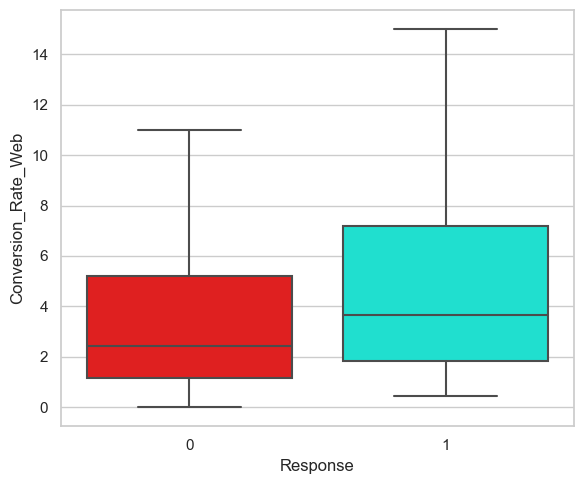

In [48]:
#Visualisasi dengan BoxPlot
plt.figure(figsize=(6, 5))
colors=["#ff0000", "#00ffea"]

sns.boxplot(x=df["Response"], y=df["Conversion_Rate_Web"], orient='v', palette=colors, showfliers=False)
plt.tight_layout()

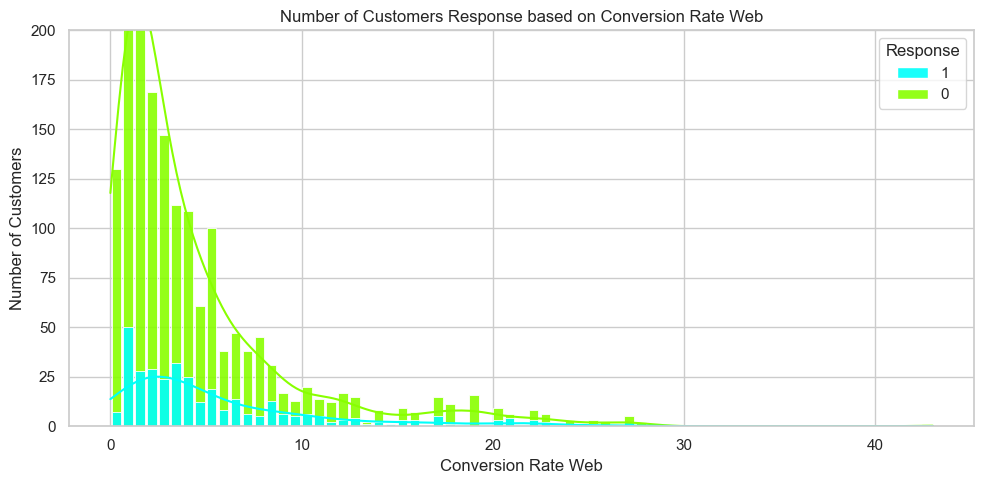

In [49]:
#Visualisasi dengan HistPlot
fig = plt.figure(figsize = (10, 5))

colors=["#00fffb", "#88ff00"]

ax = sns.histplot(data=df, x='Conversion_Rate_Web', hue='Response', 
             palette=colors, alpha=0.9,
             kde = True, shrink = 0.8,
            hue_order=[1,0])
plt.xlabel('Conversion Rate Web')
plt.ylabel('Number of Customers')
plt.title('Number of Customers Response based on Conversion Rate Web')

plt.ylim(0, 200)

plt.tight_layout()
plt.show()

### Convertion Rate Web vs Cat Values

Text(0.5, 1.03, 'Conversion Rate Web vs Cat Values')

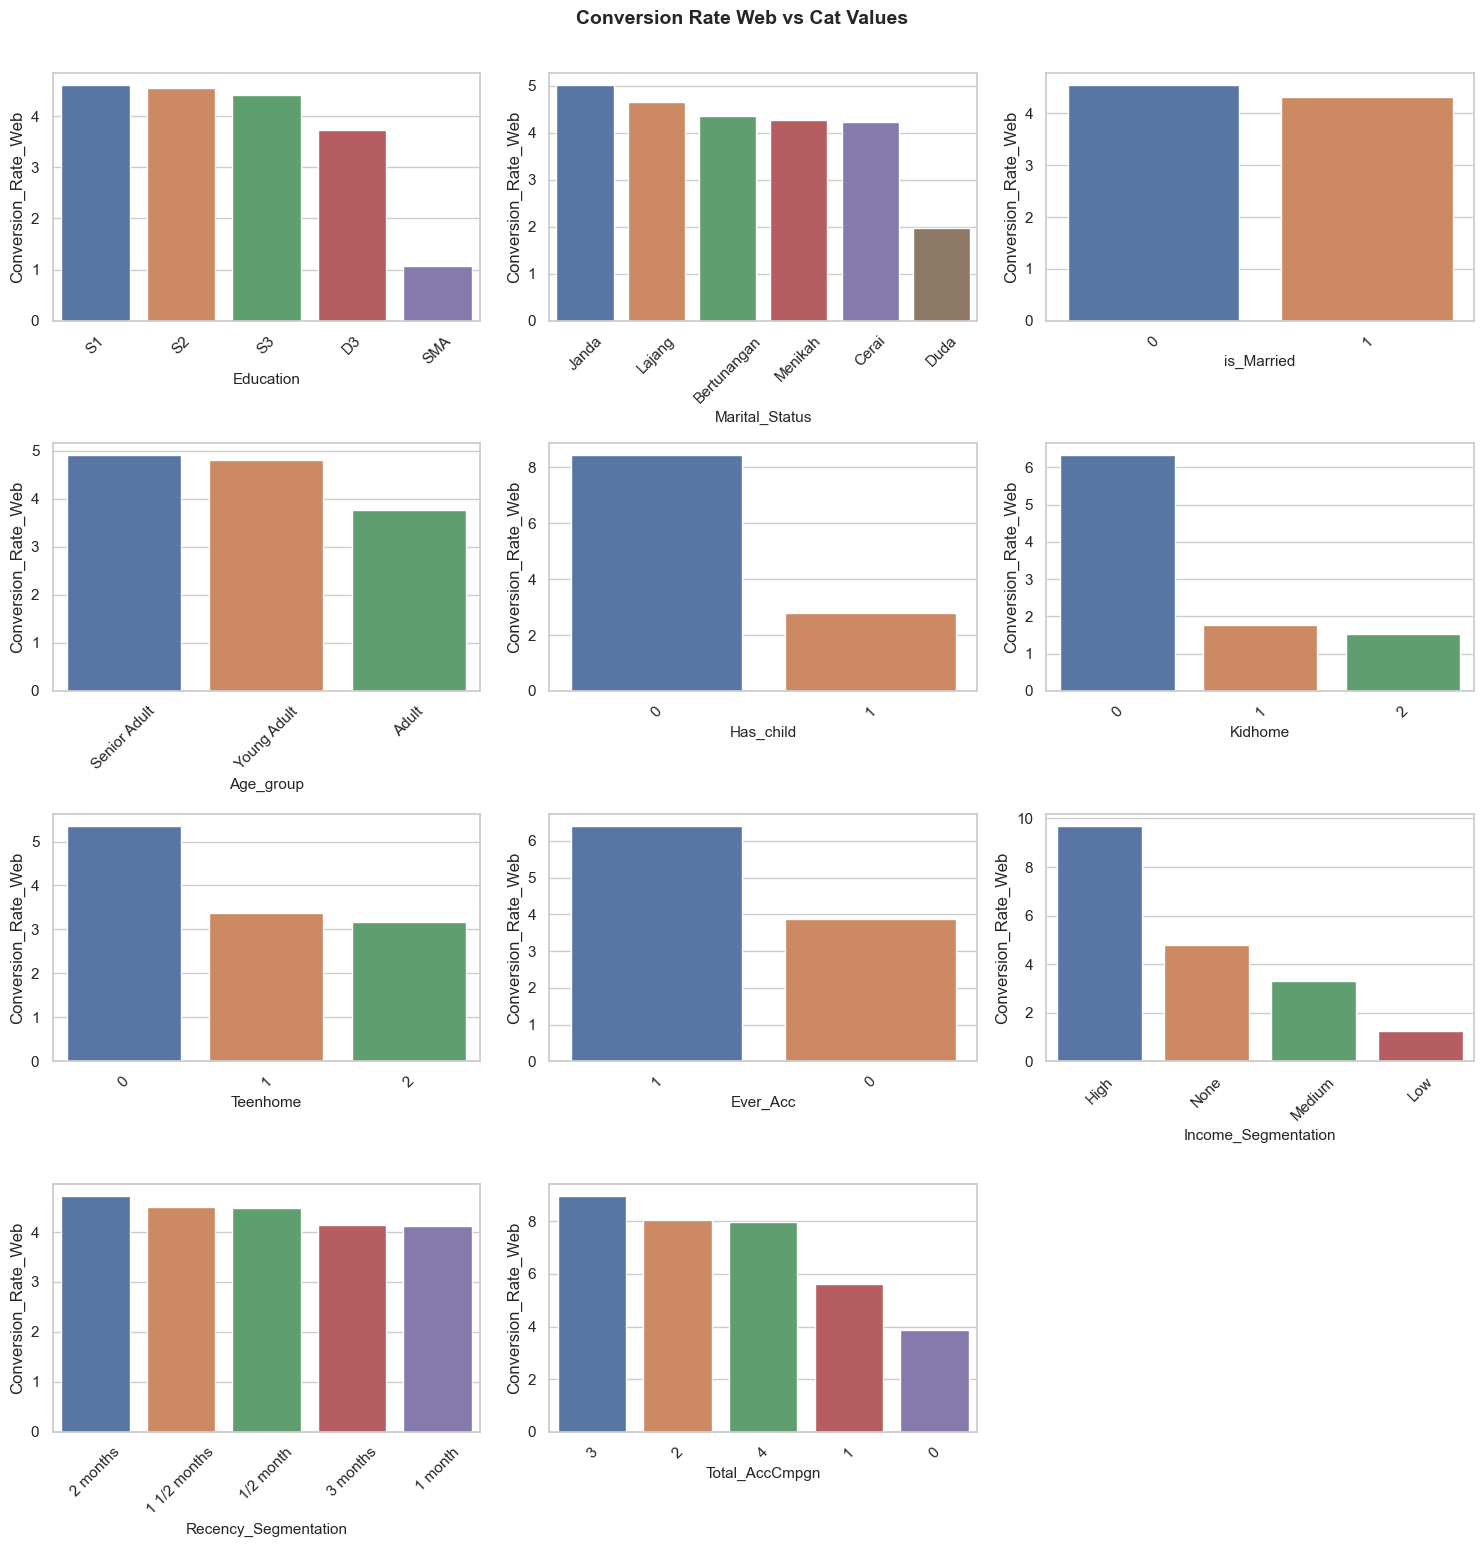

In [50]:
fig = plt.figure(figsize=(15,15))
cat = ['Education', 'Marital_Status', 'is_Married', 'Age_group', 'Has_child', 'Kidhome', 'Teenhome', 'Ever_Acc', 'Income_Segmentation', 'Recency_Segmentation', 'Total_AccCmpgn']
n=4
for i, col in enumerate(cat):
    dfgc = df.groupby(df[col]).agg({'Age':'count', 'Conversion_Rate_Web':'mean'})
    dfgc.sort_values(by='Conversion_Rate_Web', ascending=False, inplace=True)
    plt.subplot(n, math.ceil(len(cat)/n), i+1)
    sns.barplot(x=dfgc.index, y=dfgc["Conversion_Rate_Web"], errorbar=None, order=dfgc.index)
    plt.xlabel(None)
    plt.xlabel(col, fontsize=11)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
fig.suptitle("Conversion Rate Web vs Cat Values", y=1.03, fontsize=14, fontweight="bold")

### Convertion Rate Web vs Num Values

<Axes: >

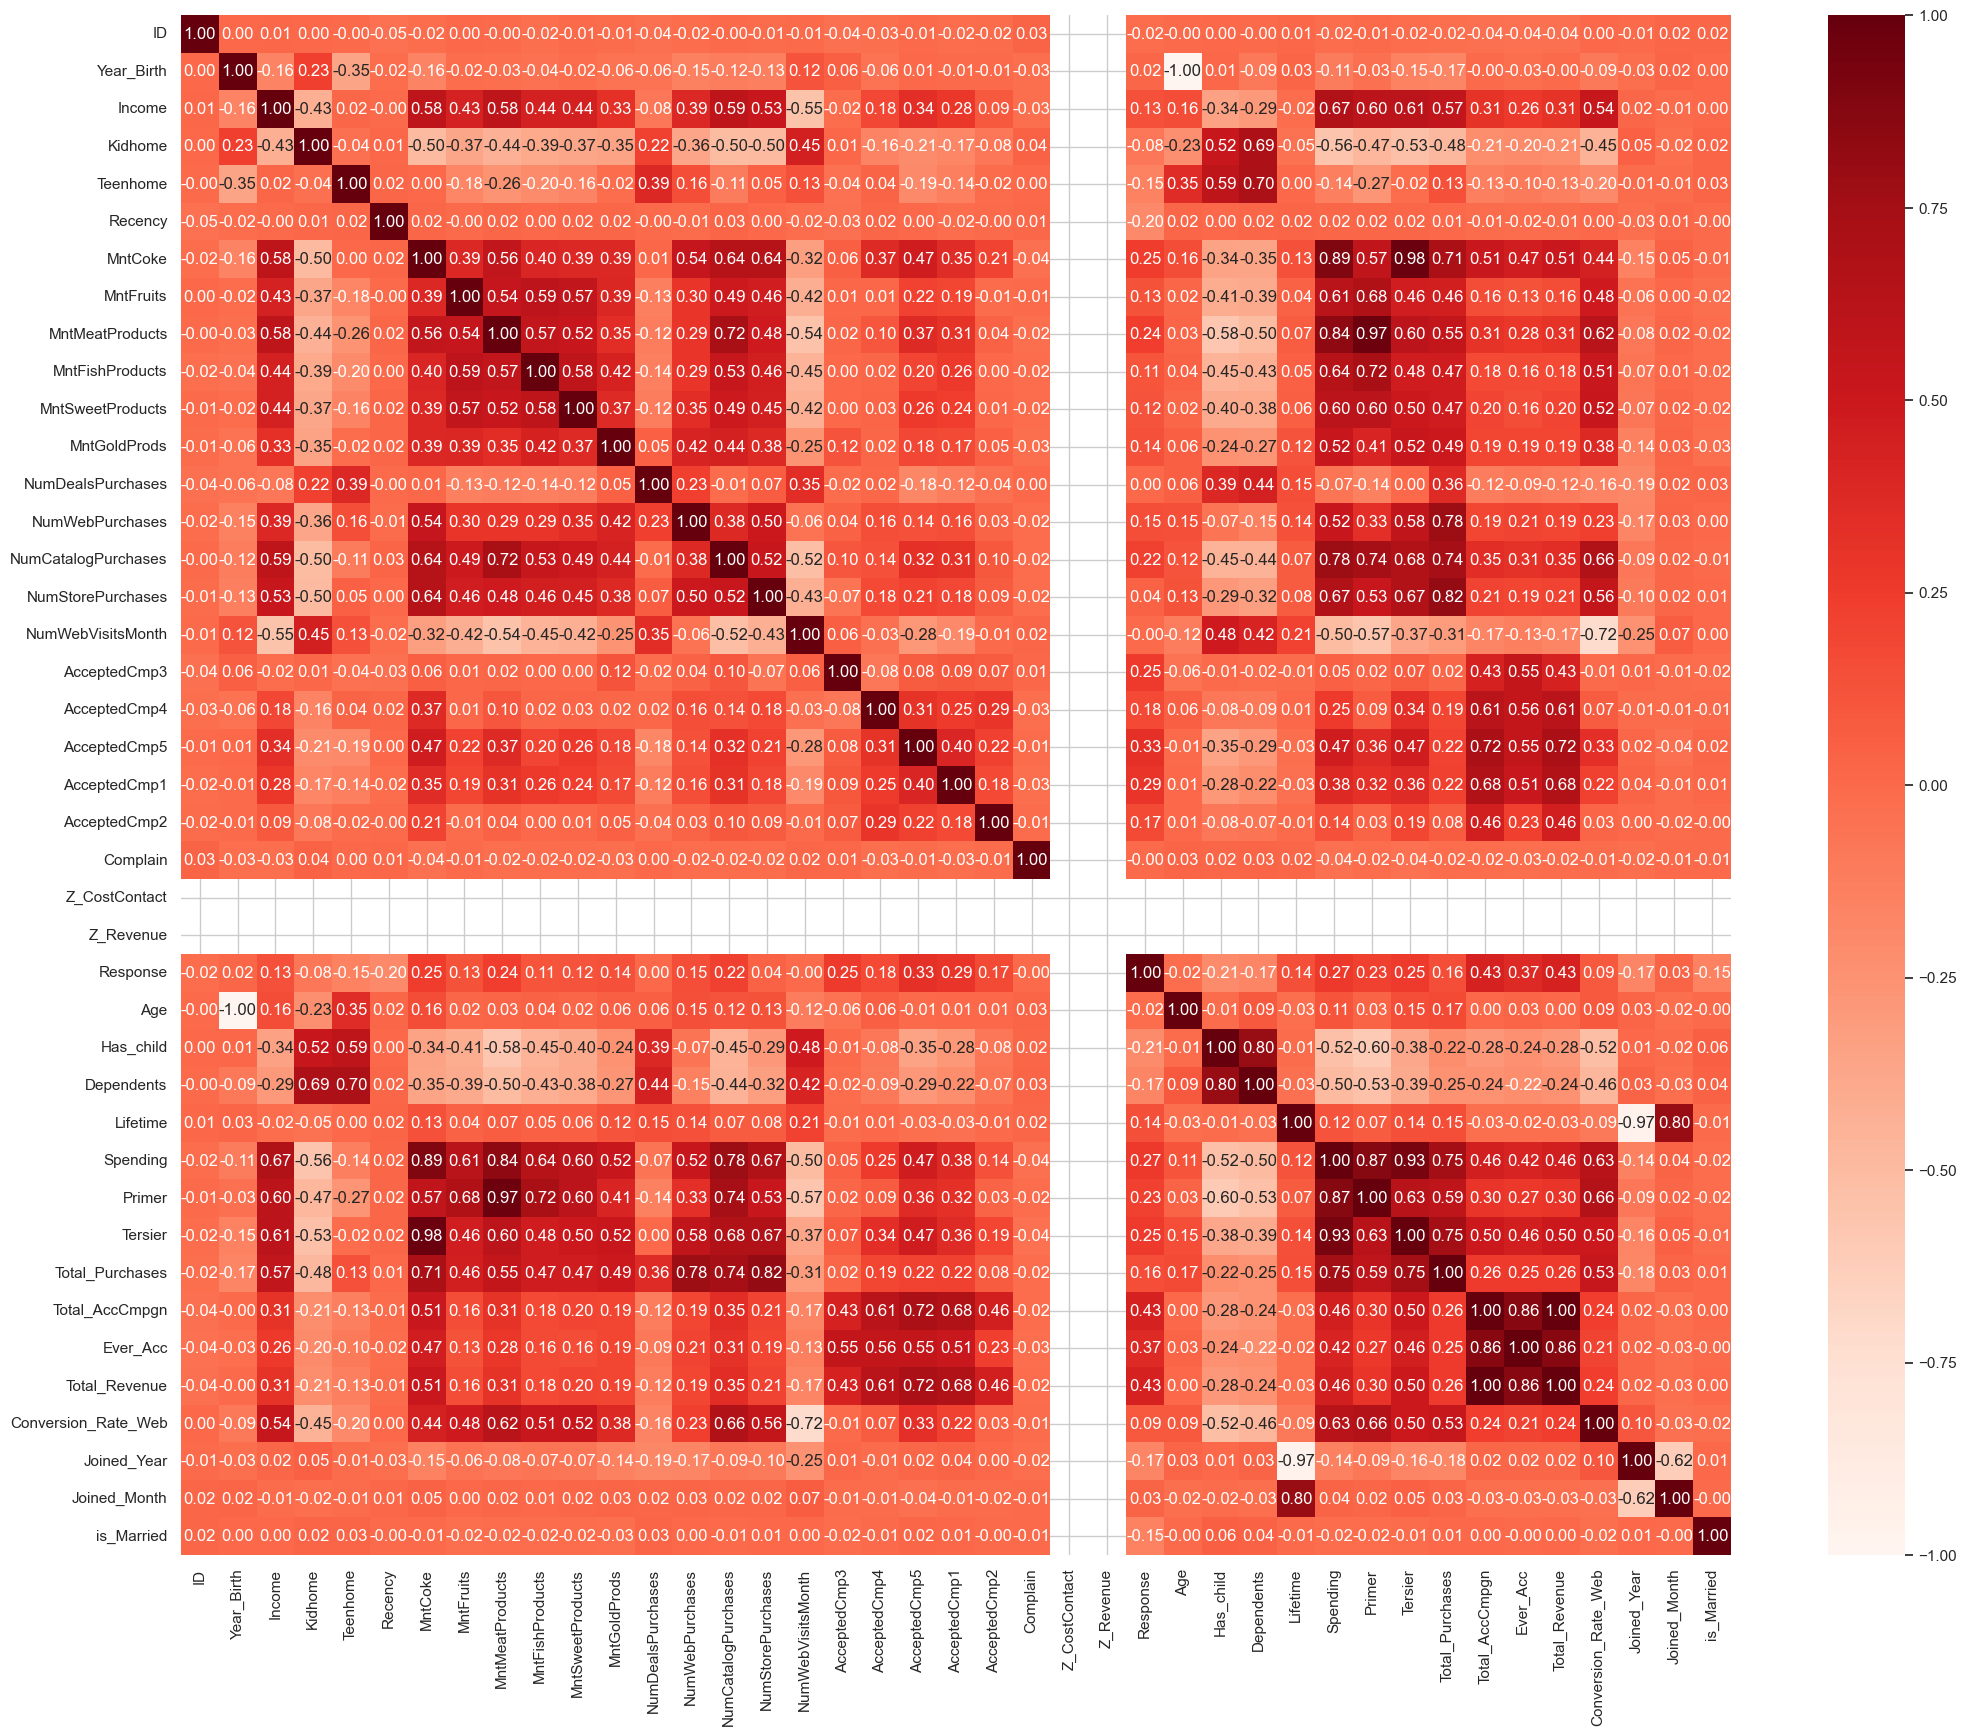

In [65]:
dfheatmap = df.copy()
dfhm = dfheatmap.select_dtypes(include=[float, int])
plt.figure(figsize=(25,20))
sns.heatmap(dfhm.corr(), cmap='Reds', annot=True, fmt='.2f')

In [68]:
#Untuk melihat tipe korelasinya dengan Conversion Rate Web
corr = dfhm.corrwith(dfhm["Conversion_Rate_Web"])
corr = corr.reset_index(name='corr value')
corr = corr[corr["index"] != "Conversion_Rate_Web"]
corr["Corr Type"] = corr["corr value"].apply(lambda x : "Positif" if x >= 0 else "Negatif")
corr["corr value"] = corr["corr value"].apply(lambda x : abs(x))
corr.sort_values('corr value', ascending=False, ignore_index=True, inplace=True)
corr

index  corr value Corr Type
0     NumWebVisitsMonth       0.721   Negatif
1   NumCatalogPurchases       0.664   Positif
2                Primer       0.655   Positif
3              Spending       0.629   Positif
4       MntMeatProducts       0.622   Positif
5     NumStorePurchases       0.556   Positif
6                Income       0.538   Positif
7       Total_Purchases       0.533   Positif
8      MntSweetProducts       0.523   Positif
9             Has_child       0.518   Negatif
10      MntFishProducts       0.511   Positif
11              Tersier       0.504   Positif
12            MntFruits       0.483   Positif
13           Dependents       0.462   Negatif
14              Kidhome       0.445   Negatif
15              MntCoke       0.445   Positif
16         MntGoldProds       0.380   Positif
17         AcceptedCmp5       0.332   Positif
18        Total_Revenue       0.236   Positif
19       Total_AccCmpgn       0.236   Positif
20      NumWebPurchases       0.232   Positif
21         AcceptedCmp1       0.219   Positif
22             Ever_Acc       0.210   Positif
23             Teenhome       0.198   Negatif
24    NumDealsPurchases       0.157   Negatif
25          Joined_Year       0.104   Positif
26                  Age       0.094   Positif
27           Year_Birth       0.094   Negatif
28             Response       0.093   Positif
29             Lifetime       0.090   Negatif
30         AcceptedCmp4       0.071   Positif
31         Joined_Month       0.032   Negatif
32         AcceptedCmp2       0.029   Positif
33           is_Married       0.024   Negatif
34             Complain       0.015   Negatif
35         AcceptedCmp3       0.008   Negatif
36                   ID       0.002   Positif
37              Recency       0.001   Positif
38        Z_CostContact         NaN   Negatif
39            Z_Revenue         NaN   Negatif

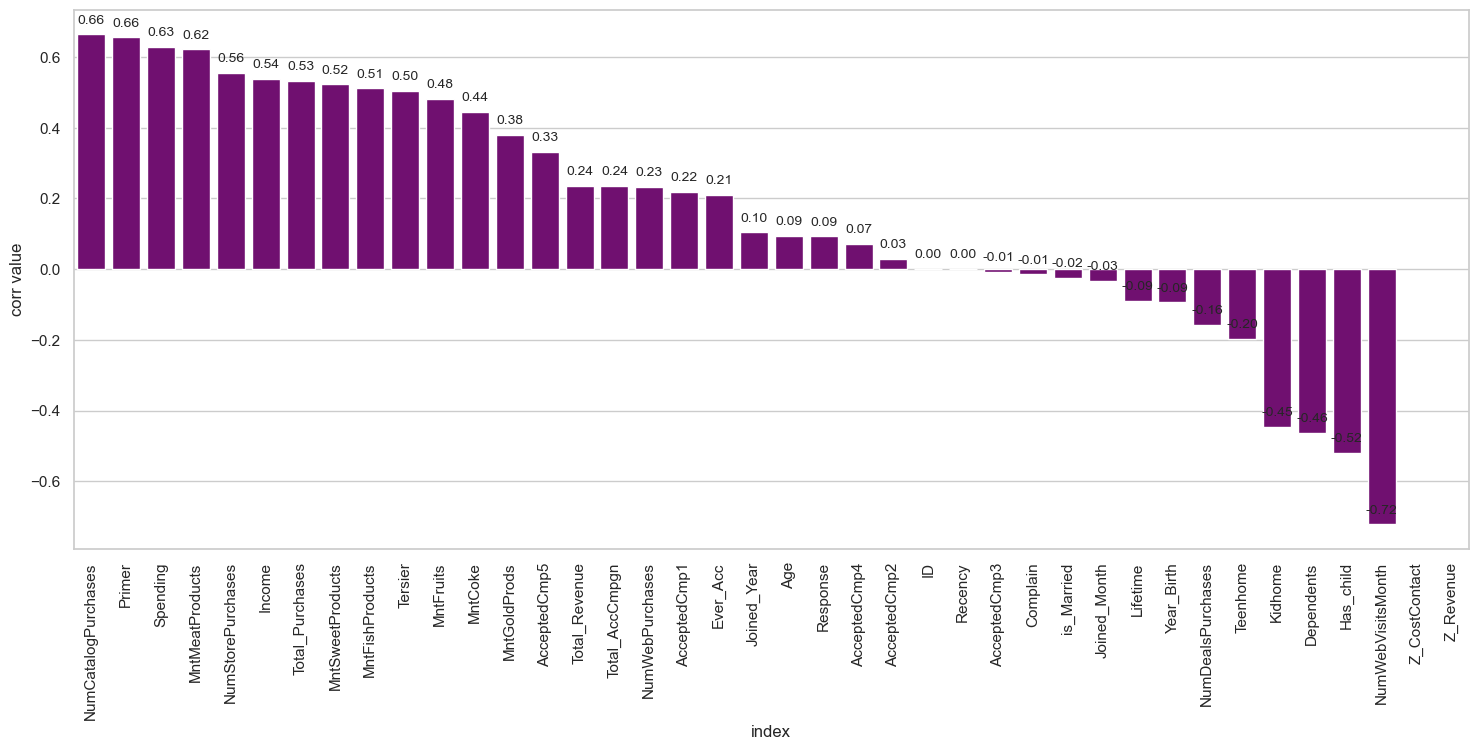

In [70]:
#Visualisasi dengan BarPlot untuk melihat
corr2 = dfhm.corrwith(dfhm["Conversion_Rate_Web"])
corr2 = corr2.reset_index(name='corr value')
corr2 = corr2.sort_values('corr value', ascending=False)[1:]

plt.figure(figsize=(18, 7))
ax = sns.barplot(x='index', y="corr value", data=corr2, order=corr2["index"], color='purple')
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():0.2f}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', 
        va = 'center', 
        xytext = (0, 10), 
        fontsize=10,
        textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()